# Origem do Algoritmo de Floyd-Warshall

O algoritmo de caminhos mínimos para todos os pares foi proposto por **Robert Floyd** (FLOYD, 1962), mas essencialmente é o mesmo algoritmo publicado por **Bernard Roy** (ROY, 1959) e por **Stephen Warshall** (WARSHALL, 1962).

Por este motivo, o algoritmo também é conhecido como **Floyd-Warshall**, **Roy-Warshall** ou **Roy-Floyd**.

---

:books: :bulb: :rocket:

# Algoritmo de Floyd-Warshall

🔄 O algoritmo de Floyd utiliza um procedimento incremental sobre a matriz de custos do grafo para encontrar os caminhos mínimos entre **todos os pares de vértices**.

- O grafo pode ser **dirigido** ou **não dirigido**.
- Permite arestas com custos negativos, mas **não pode haver ciclos negativos**.
- Publicado na forma atual por **Robert Floyd** (FLOYD, 1962), mas essencialmente o mesmo algoritmo de **Bernard Roy** (ROY, 1959) e **Stephen Warshall** (WARSHALL, 1962).
- Por isso, também é chamado de **Floyd-Warshall**, **Roy-Warshall** ou **Roy-Floyd**.

---

Seja $G = (V, E, W)$ um grafo valorado com $n$ vértices:

1. 🟦 Inicia-se com a **matriz de custos** do grafo.
2. 🔢 Calculam-se $n$ matrizes de distância $D$ de dimensões $n \times n$.
3. 📊 Cada elemento $d_{i,j}$ em uma matriz de distâncias contém o custo (atual) do caminho mínimo de $v_i$ para $v_j$.
4. 🏁 O valor final dos caminhos mínimos estará na **última matriz** gerada.



# Definição das Matrizes de Distância no Algoritmo de Floyd-Warshall

Para descrever o algoritmo, os índices $i$ e $j$ representam, respectivamente, **linha** e **coluna** das matrizes, correspondendo aos vértices de **origem** ($i$) e **destino** ($j$), com $i = 1, 2, \ldots, n$ e $j = 1, 2, \ldots, n$.

O índice $k$ representa a **iteração** do algoritmo, com $k = 0, 1, 2, \ldots, n$.

---

As **matrizes de distância** são definidas da seguinte forma, onde os elementos da $k$-ésima matriz são calculados a partir dos elementos da matriz anterior:

$$
d^k_{i,j} =
\begin{cases}
w_{i,j} & \text{se } k = 0 \\\\
\min\left(d^{k-1}_{i,j},\ d^{k-1}_{i,k} + d^{k-1}_{k,j}\right) & \text{se } k \geq 1
\end{cases}
$$

Note que a expressão $\min\left(d^{k-1}_{i,j},\ d^{k-1}_{i,k} + d^{k-1}_{k,j}\right)$ compara o menor custo já conhecido entre $i$ e $j$ com o custo de passar por $k$ como intermediário.

---


# Matrizes de Roteamento no Algoritmo de Floyd-Warshall

Sempre que o custo do caminho mínimo entre um determinado par de vértices é atualizado, também é necessário atualizar os dados que mantêm os caminhos (ou rotas).

- Nos algoritmos de busca e no de Dijkstra, os caminhos formam **árvores** com o vértice inicial na raiz.
- Essas árvores podem ser armazenadas por **vetores de predecessores** (roteamento).

No algoritmo de Floyd-Warshall, como cada vértice pode ser origem, são necessários $n$ vetores de roteamento. Uma forma conveniente de manter esses dados é por meio das **Matrizes de Roteamento**, denotadas por $R$.

---

Um elemento $fl_{i,j}$ de uma matriz de roteamento armazena uma referência para o **predecessor** do vértice $v_j$ em um caminho iniciado no vértice $v_i$.

- Cada **linha $i$** da matriz de roteamento representa os predecessores para caminhos com origem em $v_i$.
- Assim, é possível reconstruir o caminho mínimo de $v_i$ até $v_j$ percorrendo os predecessores armazenados em $R$.

---

:triangular_flag_on_post: :arrows_counterclockwise: :file_folder:

# Inicialização e Atualização das Matrizes de Roteamento

A matriz $R$ é um vetor de roteamento armazenando os caminhos com origem no vértice $v_i$.

O algoritmo de Floyd constrói $k$ matrizes de roteamento. A matriz inicial (para $k = 0$) é definida por:

$$
fl^0_{i,j} =
\begin{cases}
\text{nil} & \text{se } i = j \text{ ou } w_{i,j} = \infty \\\\
v_i & \text{se } i \neq j \text{ e } w_{i,j} < \infty
\end{cases}
$$

---

Para $k \geq 1$, se houver uma atualização do caminho mínimo passando pelo vértice $v_k$ (ou seja, $v_i \rightarrow v_k \rightarrow v_j$), o vértice predecessor é atualizado assim:

$$
fl^k_{i,j} =
\begin{cases}
fl^{k-1}_{i,j} & \text{se } d^{k-1}_{i,j} \leq d^{k-1}_{i,k} + d^{k-1}_{k,j} \\\\
fl^{k-1}_{k,j} & \text{se } d^{k-1}_{i,j} > d^{k-1}_{i,k} + d^{k-1}_{k,j}
\end{cases}
$$

---

O pseudocódigo do algoritmo incorpora as inicializações e atualizações das matrizes $D$ (distâncias) e $R$ (roteamento) para o cálculo dos caminhos mínimos entre todos os pares de vértices.

:bookmark_tabs: :repeat: :compass:

# Pseudocódigo do Algoritmo de Floyd-Warshall

A seguir, o pseudocódigo completo do algoritmo de Floyd-Warshall, incluindo as inicializações e atualizações das matrizes de distância $D$ e de roteamento $R$:

```text
Floyd(G, W)
    para cada i = 1 até n faça
        para cada j = 1 até n faça
            d⁰_{i,j} ← w_{i,j}
            fl⁰_{i,j} ← v_i
    para cada k = 1 até n faça
        para cada i = 1 até n faça
            para cada j = 1 até n faça
                se (d^{k-1}_{i,k} + d^{k-1}_{k,j}) < d^{k-1}_{i,j} então
                    d^k_{i,j} ← d^{k-1}_{i,k} + d^{k-1}_{k,j}
                    fl^k_{i,j} ← fl^{k-1}_{k,j}
                senão
                    d^k_{i,j} ← d^{k-1}_{i,j}
                    fl^k_{i,j} ← fl^{k-1}_{i,j}
```

---

Este algoritmo calcula os menores custos e os predecessores para **todos os pares de vértices** do grafo, permitindo reconstruir os caminhos mínimos.

:computer: :straight_ruler: :rocket:

In [6]:
import numpy as np

# Matriz de custos (∞ = np.inf)
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
n = len(labels)
inf = float('inf')
cost = np.array([
    [0,   5,  inf, inf, inf, inf, inf, inf],
    [5,   0,   4,  15, inf, inf, inf, inf],
    [inf, 4,   0,  16, 12, inf, inf, inf],
    [inf,15,  16,   0, inf,  5, 14, 13],
    [inf,inf, 12, inf,  0, inf,  8,  2],
    [inf,inf, inf,  5, inf,  0,  9, 11],
    [inf,inf, inf, 14,  8,  9,  0, 15],
    [inf,inf, inf, 13,  2, 11, 15,  0]
])

# Floyd-Warshall
dist = cost.copy()
pred = np.full((n, n), None)
for i in range(n):
    for j in range(n):
        if i != j and cost[i, j] != inf:
            pred[i, j] = i

for k in range(n):
    for i in range(n):
        for j in range(n):
            if dist[i, k] + dist[k, j] < dist[i, j]:
                dist[i, j] = dist[i, k] + dist[k, j]
                pred[i, j] = pred[k, j]

# Exibindo a matriz de menores custos
print("Matriz de menores custos entre todos os pares de vértices:")
print("    " + "  ".join(labels))
for i in range(n):
    linha = [f"{dist[i, j]:>3}" if dist[i, j] != inf else " ∞" for j in range(n)]
    print(f"{labels[i]}: " + " ".join(linha))

# Exemplo: caminho mínimo de 'a' até 'h'
def caminho_minimo(pred, i, j):
    if pred[i, j] is None:
        return []
    caminho = [j]
    while j != i:
        j = pred[i, j]
        caminho.append(j)
    return caminho[::-1]

i, j = labels.index('a'), labels.index('h')
caminho = caminho_minimo(pred, i, j)
print(f"\nCaminho mínimo de 'a' até 'h':", " → ".join(labels[k] for k in caminho))
print(f"Custo: {dist[i, j]}")

Matriz de menores custos entre todos os pares de vértices:
    a  b  c  d  e  f  g  h
a: 0.0 5.0 9.0 20.0 21.0 25.0 29.0 23.0
b: 5.0 0.0 4.0 15.0 16.0 20.0 24.0 18.0
c: 9.0 4.0 0.0 16.0 12.0 21.0 20.0 14.0
d: 20.0 15.0 16.0 0.0 15.0 5.0 14.0 13.0
e: 21.0 16.0 12.0 15.0 0.0 13.0 8.0 2.0
f: 25.0 20.0 21.0 5.0 13.0 0.0 9.0 11.0
g: 29.0 24.0 20.0 14.0 8.0 9.0 0.0 10.0
h: 23.0 18.0 14.0 13.0 2.0 11.0 10.0 0.0

Caminho mínimo de 'a' até 'h': a → b → c → e → h
Custo: 23.0


Matriz de menores custos (Floyd-Warshall):
    a  b  c  d  e  f  g  h
a: 0.0 5.0 9.0 24.0 17.0 4.0 19.0 18.0
b:  ∞ 0.0 4.0 19.0 12.0 5.0 14.0 13.0
c:  ∞  ∞ 0.0 15.0 8.0  ∞ 10.0 9.0
d:  ∞  ∞  ∞ 0.0  ∞  ∞  ∞ 15.0
e:  ∞  ∞  ∞  ∞ 0.0  ∞ 2.0 11.0
f:  ∞  ∞  ∞  ∞  ∞ 0.0  ∞  ∞
g:  ∞  ∞  ∞  ∞  ∞  ∞ 0.0 9.0
h:  ∞  ∞  ∞  ∞  ∞  ∞  ∞ 0.0

Matriz de predecessores (R):
    a  b  c  d  e  f  g  h
a:   -   a   b   c   c   a   e   c
b:   -   -   b   c   c   b   e   c
c:   -   -   -   c   c   -   e   c
d:   -   -   -   -   -   -   -   d
e:   -   -   -   -   -   -   e   e
f:   -   -   -   -   -   -   -   -
g:   -   -   -   -   -   -   -   g
h:   -   -   -   -   -   -   -   -

Caminho mínimo de 'a' até 'h': a → b → c → h
Custo: 18.0


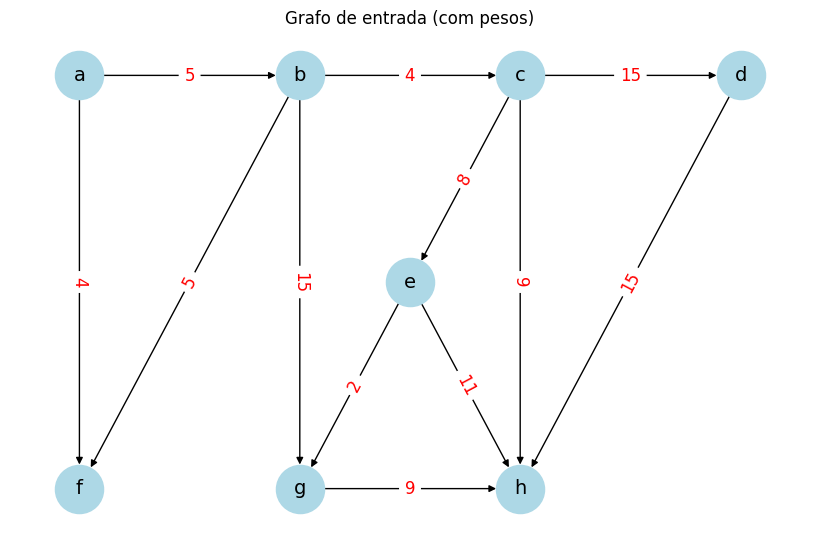

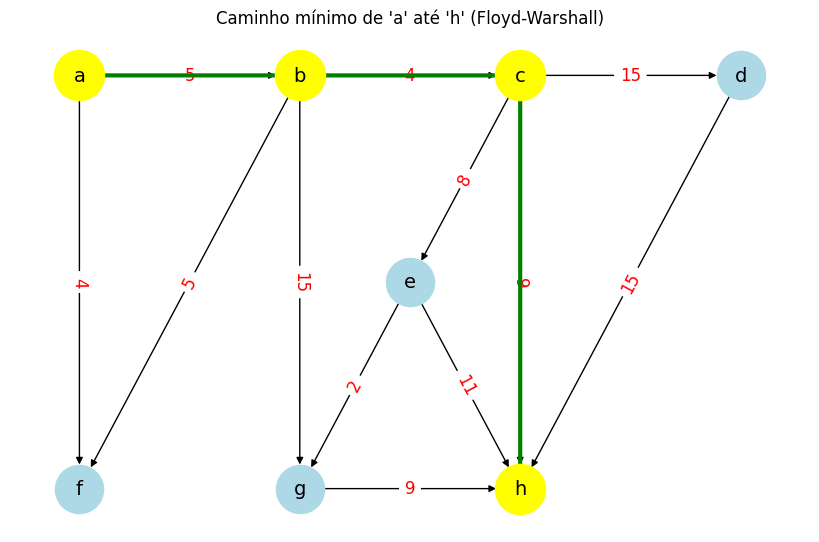

In [7]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Defina a posição fixa dos vértices
pos = {
    'a': (-2, 2),
    'b': (0, 2),
    'c': (2, 2),
    'd': (4, 2),
    'e': (1, 1),
    'f': (-2, 0),
    'g': (0, 0),
    'h': (2, 0)
}

# Exemplo de grafo com pesos (pode ser dirigido ou não dirigido)
G = nx.DiGraph()
arestas = [
    ('a', 'b', 5),
    ('a', 'f', 4),
    ('b', 'c', 4),
    ('b', 'f', 5),
    ('b', 'g', 15),
    ('c', 'd', 15),
    ('c', 'e', 8),
    ('c', 'h', 9),
    ('d', 'h', 15),
    ('e', 'g', 2),
    ('e', 'h', 11),
    ('g', 'h', 9),
]
for u, v, w in arestas:
    G.add_edge(u, v, weight=w)

labels = sorted(G.nodes)
n = len(labels)
label_idx = {label: idx for idx, label in enumerate(labels)}
inf = float('inf')

# Inicialização das matrizes de distância e roteamento
D = np.full((n, n), inf)
R = np.full((n, n), None, dtype=object)
for i, u in enumerate(labels):
    for j, v in enumerate(labels):
        if u == v:
            D[i, j] = 0
            R[i, j] = None
        elif G.has_edge(u, v):
            D[i, j] = G[u][v]['weight']
            R[i, j] = u
        else:
            D[i, j] = inf
            R[i, j] = None

# Floyd-Warshall com matriz de roteamento
for k in range(n):
    for i in range(n):
        for j in range(n):
            if D[i, k] + D[k, j] < D[i, j]:
                D[i, j] = D[i, k] + D[k, j]
                R[i, j] = R[k, j]

# Exibir matriz de menores custos
print("Matriz de menores custos (Floyd-Warshall):")
print("    " + "  ".join(labels))
for i in range(n):
    linha = [f"{D[i, j]:>3}" if D[i, j] != inf else " ∞" for j in range(n)]
    print(f"{labels[i]}: " + " ".join(linha))

# Exibir matriz de predecessores
print("\nMatriz de predecessores (R):")
print("    " + "  ".join(labels))
for i in range(n):
    linha = [f"{R[i, j] if R[i, j] is not None else '-':>3}" for j in range(n)]
    print(f"{labels[i]}: " + " ".join(linha))

# Função para reconstruir caminho mínimo de u até v
def caminho_minimo(R, labels, u, v):
    i, j = labels.index(u), labels.index(v)
    if D[i, j] == inf:
        return []
    caminho = [v]
    while R[i, j] is not None:
        v = R[i, j]
        j = labels.index(v)
        caminho.append(v)
    return caminho[::-1]

# Exemplo: caminho mínimo de 'a' até 'h'
caminho = caminho_minimo(R, labels, 'a', 'h')
print("\nCaminho mínimo de 'a' até 'h':", " → ".join(caminho))
print("Custo:", D[labels.index('a'), labels.index('h')])

# --- PLOT DO GRAFO DE ENTRADA ---
plt.figure(figsize=(8,5))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1200, font_size=14, arrows=True)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)
plt.title("Grafo de entrada (com pesos)")
plt.show()

# --- PLOT DO GRAFO DESTACANDO O CAMINHO MÍNIMO ---
plt.figure(figsize=(8,5))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1200, font_size=14, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)
# Destaca o caminho mínimo de 'a' até 'h'
if len(caminho) > 1:
    path_edges = list(zip(caminho, caminho[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='green', width=3)
    nx.draw_networkx_nodes(G, pos, nodelist=caminho, node_color='yellow', node_size=1300)
plt.title("Caminho mínimo de 'a' até 'h' (Floyd-Warshall)")
plt.show()

Caminho mínimo de 'a' até 'h': a → b → c → h
Custo: 18.0


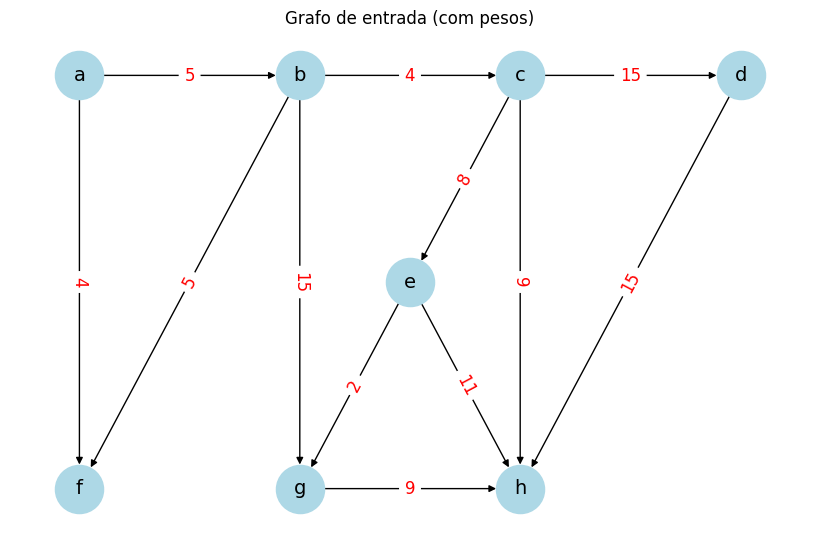

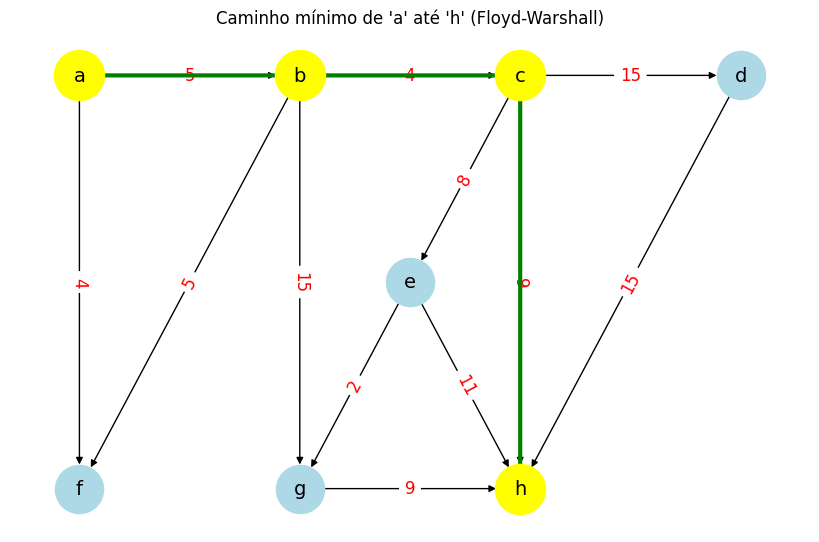

In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def floyd_warshall_setg(G):
    labels = sorted(G.nodes)
    n = len(labels)
    inf = float('inf')
    D = np.full((n, n), inf)
    R = np.full((n, n), None, dtype=object)
    for i, u in enumerate(labels):
        for j, v in enumerate(labels):
            if u == v:
                D[i, j] = 0
                R[i, j] = None
            elif G.has_edge(u, v):
                D[i, j] = G[u][v]['weight']
                R[i, j] = u
            else:
                D[i, j] = inf
                R[i, j] = None
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if D[i, k] + D[k, j] < D[i, j]:
                    D[i, j] = D[i, k] + D[k, j]
                    R[i, j] = R[k, j]
    return D, R, labels

# Exemplo de uso:
arestas = [
    ('a', 'b', 5),
    ('a', 'f', 4),
    ('b', 'c', 4),
    ('b', 'f', 5),
    ('b', 'g', 15),
    ('c', 'd', 15),
    ('c', 'e', 8),
    ('c', 'h', 9),
    ('d', 'h', 15),
    ('e', 'g', 2),
    ('e', 'h', 11),
    ('g', 'h', 9),
]
G = nx.DiGraph()
for u, v, w in arestas:
    G.add_edge(u, v, weight=w)

# Posição fixa dos vértices
pos = {
    'a': (-2, 2),
    'b': (0, 2),
    'c': (2, 2),
    'd': (4, 2),
    'e': (1, 1),
    'f': (-2, 0),
    'g': (0, 0),
    'h': (2, 0)
}

D, R, labels = floyd_warshall_setg(G)

# Função para reconstruir caminho mínimo de u até v
def caminho_minimo(R, labels, u, v):
    i, j = labels.index(u), labels.index(v)
    if D[i, j] == float('inf'):
        return []
    caminho = [v]
    while R[i, j] is not None:
        v = R[i, j]
        j = labels.index(v)
        caminho.append(v)
    return caminho[::-1]

# Exemplo: caminho mínimo de 'a' até 'h'
caminho = caminho_minimo(R, labels, 'a', 'h')
print("Caminho mínimo de 'a' até 'h':", " → ".join(caminho))
print("Custo:", D[labels.index('a'), labels.index('h')])

# --- PLOT DO GRAFO DE ENTRADA ---
plt.figure(figsize=(8,5))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1200, font_size=14, arrows=True)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)
plt.title("Grafo de entrada (com pesos)")
plt.show()

# --- PLOT DO GRAFO DESTACANDO O CAMINHO MÍNIMO ---
plt.figure(figsize=(8,5))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1200, font_size=14, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)
if len(caminho) > 1:
    path_edges = list(zip(caminho, caminho[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='green', width=3)
    nx.draw_networkx_nodes(G, pos, nodelist=caminho, node_color='yellow', node_size=1300)
plt.title("Caminho mínimo de 'a' até 'h' (Floyd-Warshall)")
plt.show()

In [9]:
def floyd_warshall_setg_verbose(G, pos=None):
    labels = sorted(G.nodes)
    n = len(labels)
    inf = float('inf')
    D = np.full((n, n), inf)
    R = np.full((n, n), None, dtype=object)
    # Inicialização
    for i, u in enumerate(labels):
        for j, v in enumerate(labels):
            if u == v:
                D[i, j] = 0
                R[i, j] = None
            elif G.has_edge(u, v):
                D[i, j] = G[u][v]['weight']
                R[i, j] = u
            else:
                D[i, j] = inf
                R[i, j] = None

    # Passo 0: Matriz inicial
    print(f"\nPasso k = 0 (inicial):")
    print("Matriz de custos D:")
    print("    " + "  ".join(labels))
    for i in range(n):
        linha = [f"{D[i, j]:>3}" if D[i, j] != inf else " ∞" for j in range(n)]
        print(f"{labels[i]}: " + " ".join(linha))
    print("Matriz de predecessores R:")
    print("    " + "  ".join(labels))
    for i in range(n):
        linha = [f"{R[i, j] if R[i, j] is not None else '-':>3}" for j in range(n)]
        print(f"{labels[i]}: " + " ".join(linha))

    # Floyd-Warshall mostrando apenas os passos das matrizes (sem plot)
    for k in range(n):
        atualizado = False
        for i in range(n):
            for j in range(n):
                if D[i, k] + D[k, j] < D[i, j]:
                    D[i, j] = D[i, k] + D[k, j]
                    R[i, j] = R[k, j]
                    atualizado = True
        print(f"\nPasso K = {k+1} (usando intermediário '{labels[k]}'):")
        print("Matriz de custos D:")
        print("    " + "  ".join(labels))
        for i in range(n):
            linha = [f"{D[i, j]:>3}" if D[i, j] != inf else " ∞" for j in range(n)]
            print(f"{labels[i]}: " + " ".join(linha))
        print("Matriz de predecessores R:")
        print("    " + "  ".join(labels))
        for i in range(n):
            linha = [f"{R[i, j] if R[i, j] is not None else '-':>3}" for j in range(n)]
            print(f"{labels[i]}: " + " ".join(linha))
    return D, R, labels

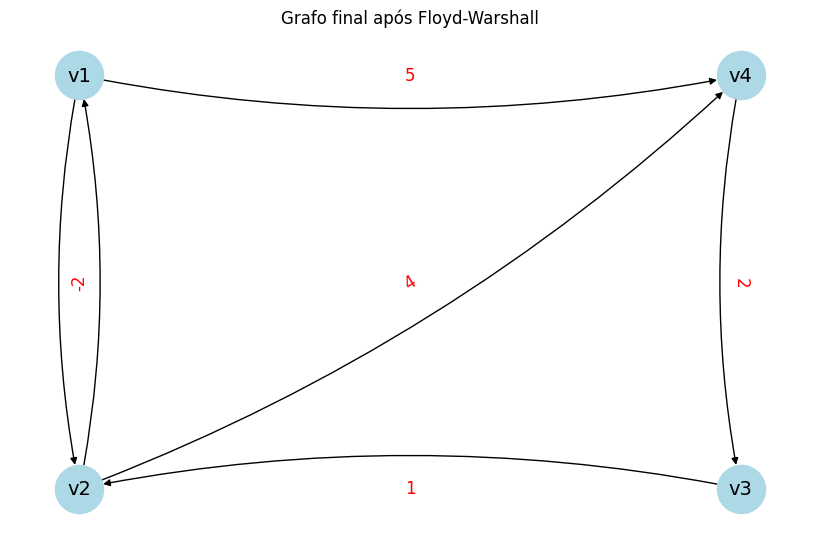


Passo k = 0 (inicial):
Matriz de custos D:
    v1  v2  v3  v4
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 4.0
v3:  ∞ 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0
Matriz de predecessores R:
    v1  v2  v3  v4
v1:   -  v1   -  v1
v2:  v2   -   -  v2
v3:   -  v3   -   -
v4:   -   -  v4   -

Passo K = 1 (usando intermediário 'v1'):
Matriz de custos D:
    v1  v2  v3  v4
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3:  ∞ 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0
Matriz de predecessores R:
    v1  v2  v3  v4
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:   -  v3   -   -
v4:   -   -  v4   -

Passo K = 2 (usando intermediário 'v2'):
Matriz de custos D:
    v1  v2  v3  v4
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4:  ∞  ∞ 2.0 0.0
Matriz de predecessores R:
    v1  v2  v3  v4
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:   -   -  v4   -

Passo K = 3 (usando intermediário 'v3'):
Matriz de custos D:
    v1  v2  v3  v4
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4: 1.0 3.0 2.0 0.0
Matriz d

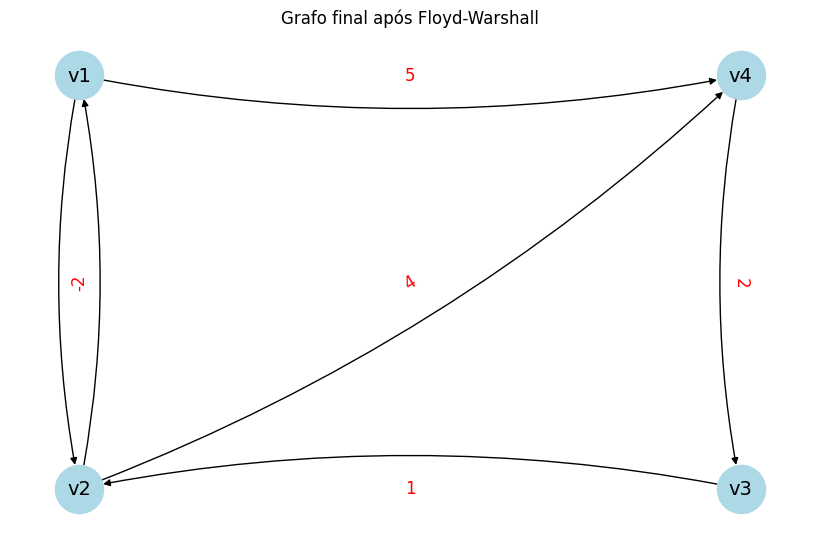

In [10]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# def floyd_warshall_setg_verbose(G, pos=None):
#     labels = sorted(G.nodes)
#     n = len(labels)
#     inf = float('inf')
#     D = np.full((n, n), inf)
#     R = np.full((n, n), None, dtype=object)
#     # Inicialização
#     for i, u in enumerate(labels):
#         for j, v in enumerate(labels):
#             if u == v:
#                 D[i, j] = 0
#                 R[i, j] = None
#             elif G.has_edge(u, v):
#                 D[i, j] = G[u][v]['weight']
#                 R[i, j] = u
#             else:
#                 D[i, j] = inf
#                 R[i, j] = None

#     # Passo 0: Matriz inicial
#     print(f"\nPasso k = 0 (inicial):")
#     print("Matriz de custos D:")
#     print("    " + "  ".join(labels))
#     for i in range(n):
#         linha = [f"{D[i, j]:>3}" if D[i, j] != inf else " ∞" for j in range(n)]
#         print(f"{labels[i]}: " + " ".join(linha))
#     print("Matriz de predecessores R:")
#     print("    " + "  ".join(labels))
#     for i in range(n):
#         linha = [f"{R[i, j] if R[i, j] is not None else '-':>3}" for j in range(n)]
#         print(f"{labels[i]}: " + " ".join(linha))
#     if pos:
#         plt.figure(figsize=(8,5))
#         nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1200, font_size=14, arrows=True, connectionstyle='arc3,rad=0.1')
#         edge_labels = nx.get_edge_attributes(G, 'weight')
#         nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)
#         plt.title("Grafo de entrada (passo 0)")
#         plt.show()

#     # Floyd-Warshall com visualização dos passos
#     for k in range(n):
#         atualizado = False
#         for i in range(n):
#             for j in range(n):
#                 if D[i, k] + D[k, j] < D[i, j]:
#                     D[i, j] = D[i, k] + D[k, j]
#                     R[i, j] = R[k, j]
#                     atualizado = True
#         print(f"\nPasso K = {k+1} (usando intermediário '{labels[k]}'):")
#         print("Matriz de custos D:")
#         print("    " + "  ".join(labels))
#         for i in range(n):
#             linha = [f"{D[i, j]:>3}" if D[i, j] != inf else " ∞" for j in range(n)]
#             print(f"{labels[i]}: " + " ".join(linha))
#         print("Matriz de predecessores R:")
#         print("    " + "  ".join(labels))
#         for i in range(n):
#             linha = [f"{R[i, j] if R[i, j] is not None else '-':>3}" for j in range(n)]
#             print(f"{labels[i]}: " + " ".join(linha))
#         if pos and atualizado:
#             plt.figure(figsize=(8,5))
#             nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1200, font_size=14, arrows=True, connectionstyle='arc3,rad=0.1')
            
#             edge_labels = nx.get_edge_attributes(G, 'weight')
#             nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)
#             plt.title(f"Grafo após passo {k+1} (intermediário '{labels[k]}')")
#             plt.show()
#     return D, R, labels


# Exemplo de grafo com pesos (pode ser dirigido ou não dirigido)
G = nx.DiGraph()
arestas = [
    ('v1', 'v2', 3),
    ('v1', 'v4', 5),
    ('v2', 'v1', -2),
    ('v2', 'v4', 4),
    ('v3', 'v2', 1),
    ('v4', 'v3', 2)
]
# Defina a posição fixa dos vértices
pos = {
    'v1': (0, 1),
    'v2': (0, 0),
    'v3': (1, 0),
    'v4': (1, 1),
}

for u, v, w in arestas:
    G.add_edge(u, v, weight=w)
# --- PLOT DO GRAFO FINAL APÓS O FLOYD-WARSHALL (logo após calcular D, R, labels) ---
plt.figure(figsize=(8,5))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1200, font_size=14, arrows=True, connectionstyle='arc3,rad=0.1')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)
plt.title("Grafo final após Floyd-Warshall")
plt.show()

D, R, labels = floyd_warshall_setg_verbose(G, pos)


# Plot do grafo final após o algoritmo (apenas o grafo, sem destaque de caminho)
plt.figure(figsize=(8,5))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1200, font_size=14, arrows=True, connectionstyle='arc3,rad=0.1')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)
plt.title("Grafo final após Floyd-Warshall")
plt.show()
# # Função para reconstruir caminho mínimo de u até v
# def caminho_minimo(R, labels, u, v):
#     i, j = labels.index(u), labels.index(v)
#     if D[i, j] == float('inf'):
#         return []
#     caminho = [v]
#     while R[i, j] is not None:
#         v = R[i, j]
#         j = labels.index(v)
#         caminho.append(v)
#     return caminho[::-1]

# # Exemplo: caminho mínimo de 'v2' até 'v3'
# caminho = caminho_minimo(R, labels, 'v2', 'v3')
# print("\nCaminho mínimo de 'v2' até 'v3':", " → ".join(caminho))
# print("Custo:", D[labels.index('v2'), labels.index('v3')])

# # --- PLOT FINAL DO GRAFO DESTACANDO O CAMINHO MÍNIMO ---
# plt.figure(figsize=(8,5))
# nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1200, font_size=14, arrows=True, connectionstyle='arc3,rad=0.1')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'), font_color='red', font_size=12)
# if len(caminho) > 1:
#     path_edges = list(zip(caminho, caminho[1:]))
#     nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='green', width=3, connectionstyle='arc3,rad=0.1')
#     nx.draw_networkx_nodes(G, pos, nodelist=caminho, node_color='yellow', node_size=1300)
# plt.title("Caminho mínimo de 'v2' até 'v3' (Floyd-Warshall) - Resultado Final")
# plt.show()

# Como interpretar as matrizes finais do Floyd-Warshall (Exemplo)

🔎 **Interpretando os resultados do algoritmo de Floyd-Warshall:**

- O **custo do caminho mínimo** de $v_2$ para $v_3$ está no elemento $d_{2,3}$ da última matriz de distâncias ($D$).  
  💰 Exemplo: $d_{2,3} = 5$ indica que o menor custo de $v_2$ para $v_3$ é 5.

- Para encontrar o **caminho mínimo** correspondente, use a matriz de roteamento ($R$):
  1. 🏁 Comece pelo destino ($v_3$).
  2. 🔄 Veja o predecessor na linha de origem: $fl_{2,3} = v_2$.
  3. ⏪ Se o predecessor for igual ao vértice de origem ($v_2$), pare.
  4. 🏁 O caminho é a sequência do vértice de origem até o destino, passando pelos predecessores encontrados.

- 🚩 O caminho mínimo é:  
  $v_2 \rightarrow v_3$

---

💡 **Resumo visual do procedimento:**
- 1️⃣ Comece pelo destino.
- 🔁 Consulte o predecessor na matriz $R$ na linha da origem.
- ↩️ Repita até chegar à origem.
- ✅ Inverta a ordem para obter o caminho correto, se necessário.

---

# Como imprimir caminhos usando a matriz de roteamento (Floyd-Warshall)

🔎 **Os caminhos mínimos armazenados na matriz de roteamento $R$ podem ser reconstruídos recursivamente pelo seguinte algoritmo:**

---

### Algoritmo: ImprimeCaminhoMatriz(R, vi, vj)

```text
se vi = vj então
    imprime(vi)
senão
    se fl_{i,j} = nil então
        imprime("não existe caminho de vi para vj")
    senão
        ImprimeCaminhoMatriz(R, vi, fl_{i,j})
        imprime(vj)
```

---

- 🧩 **Como funciona:**  
  - Se o vértice de origem é igual ao destino, imprime o vértice.
  - Se não há predecessor (fl_{i,j} = nil), não existe caminho.
  - Caso contrário, imprime recursivamente o caminho de vi até o predecessor de vj, e então imprime vj.

- 🔁 **Este procedimento imprime o caminho mínimo de vi até vj na ordem correta.**

---

💡 **Dica:**  
Esse algoritmo é uma generalização do procedimento de reconstrução de caminhos mínimos, e pode ser facilmente implementado em Python ou outra linguagem, usando recursão.

In [11]:
import networkx as nx

def imprime_caminho_matriz(R, labels, vi, vj):
    """
    Imprime o caminho mínimo de vi até vj usando a matriz de roteamento R.
    """
    i = labels.index(vi)
    j = labels.index(vj)
    if vi == vj:
        print(vi, end='')
    elif R[i, j] is None:
        print(f"não existe caminho de {vi} para {vj}")
    else:
        imprime_caminho_matriz(R, labels, vi, R[i, j])
        print(f" → {vj}", end='')

# Exemplo de uso:
# labels = ['v1', 'v2', 'v3', 'v4']
# R = ... (matriz de roteamento gerada pelo Floyd-Warshall)
print("Caminho mínimo de v2 até v3:")
imprime_caminho_matriz(R, labels, 'v2', 'v3')
print()  # Nova linha

Caminho mínimo de v2 até v3:
v2 → v1 → v4 → v3


Caminho mínimo de v2 até v3:
v2 → v1 → v4 → v3


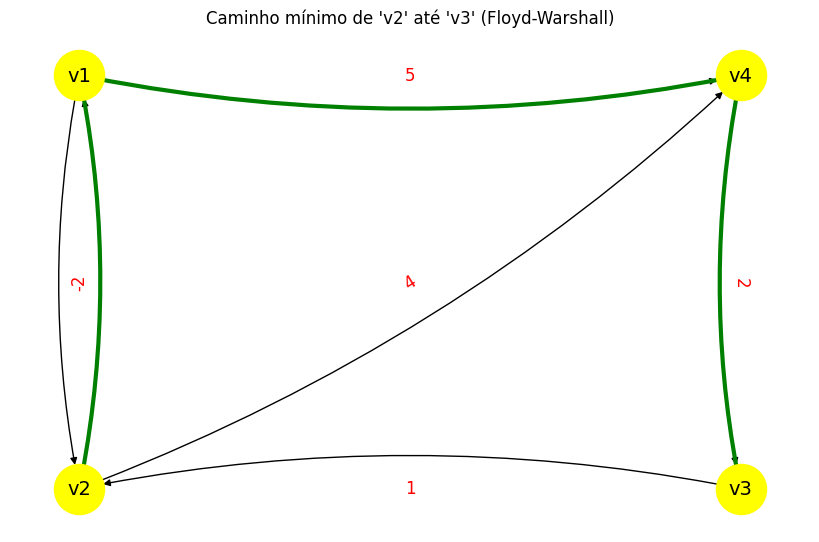

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

def imprime_caminho_matriz(R, labels, vi, vj):
    """
    Imprime o caminho mínimo de vi até vj usando a matriz de roteamento R.
    Retorna o caminho como lista para plotagem.
    """
    i = labels.index(vi)
    j = labels.index(vj)
    if vi == vj:
        print(vi, end='')
        return [vi]
    elif R[i, j] is None:
        print(f"não existe caminho de {vi} para {vj}")
        return []
    else:
        caminho = imprime_caminho_matriz(R, labels, vi, R[i, j])
        print(f" → {vj}", end='')
        return caminho + [vj]

# Exemplo de uso:
print("Caminho mínimo de v2 até v3:")
caminho = imprime_caminho_matriz(R, labels, 'v2', 'v3')
print()  # Nova linha

# Plot do caminho mínimo de v2 até v3
if len(caminho) > 1:
    plt.figure(figsize=(8,5))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1200, font_size=14, arrows=True, connectionstyle='arc3,rad=0.1')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'), font_color='red', font_size=12)
    path_edges = list(zip(caminho, caminho[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='green', width=3, connectionstyle='arc3,rad=0.1')
    nx.draw_networkx_nodes(G, pos, nodelist=caminho, node_color='yellow', node_size=1300)
    plt.title("Caminho mínimo de 'v2' até 'v3' (Floyd-Warshall)")
    plt.show()
else:
    print("Não existe caminho para plotar.")


Passo k = 0 (inicial):
Matriz de custos D:
    A  B  C  D  S
A: 0.0 6.0 4.0 8.0 2.0
B:  ∞ 0.0 5.0 8.0 6.0
C:  ∞  ∞ 0.0 9.0 4.0
D:  ∞  ∞  ∞ 0.0 7.0
S:  ∞  ∞  ∞  ∞ 0.0
Matriz de predecessores R:
    A  B  C  D  S
A:   -   A   A   A   A
B:   -   -   B   B   B
C:   -   -   -   C   C
D:   -   -   -   -   D
S:   -   -   -   -   -


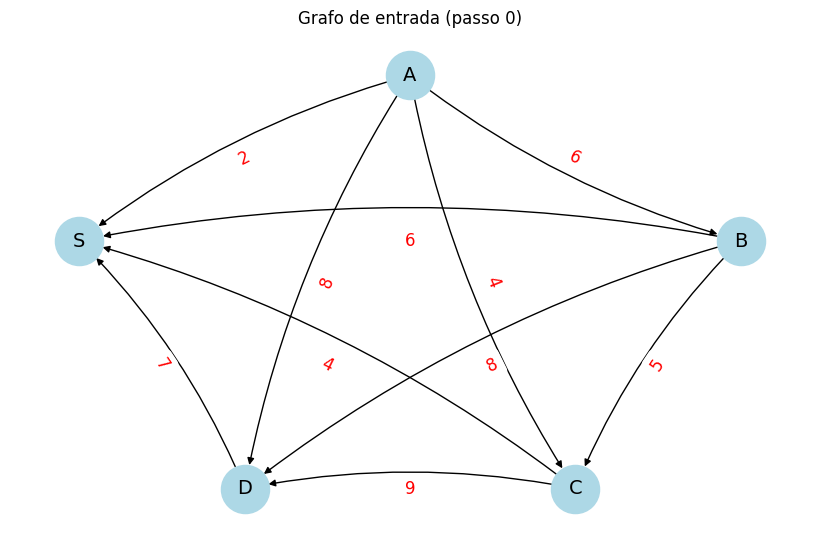


Passo K = 1 (usando intermediário 'A'):
Matriz de custos D:
    A  B  C  D  S
A: 0.0 6.0 4.0 8.0 2.0
B:  ∞ 0.0 5.0 8.0 6.0
C:  ∞  ∞ 0.0 9.0 4.0
D:  ∞  ∞  ∞ 0.0 7.0
S:  ∞  ∞  ∞  ∞ 0.0
Matriz de predecessores R:
    A  B  C  D  S
A:   -   A   A   A   A
B:   -   -   B   B   B
C:   -   -   -   C   C
D:   -   -   -   -   D
S:   -   -   -   -   -

Passo K = 2 (usando intermediário 'B'):
Matriz de custos D:
    A  B  C  D  S
A: 0.0 6.0 4.0 8.0 2.0
B:  ∞ 0.0 5.0 8.0 6.0
C:  ∞  ∞ 0.0 9.0 4.0
D:  ∞  ∞  ∞ 0.0 7.0
S:  ∞  ∞  ∞  ∞ 0.0
Matriz de predecessores R:
    A  B  C  D  S
A:   -   A   A   A   A
B:   -   -   B   B   B
C:   -   -   -   C   C
D:   -   -   -   -   D
S:   -   -   -   -   -

Passo K = 3 (usando intermediário 'C'):
Matriz de custos D:
    A  B  C  D  S
A: 0.0 6.0 4.0 8.0 2.0
B:  ∞ 0.0 5.0 8.0 6.0
C:  ∞  ∞ 0.0 9.0 4.0
D:  ∞  ∞  ∞ 0.0 7.0
S:  ∞  ∞  ∞  ∞ 0.0
Matriz de predecessores R:
    A  B  C  D  S
A:   -   A   A   A   A
B:   -   -   B   B   B
C:   -   -   -   C   C
D:   -   -   -

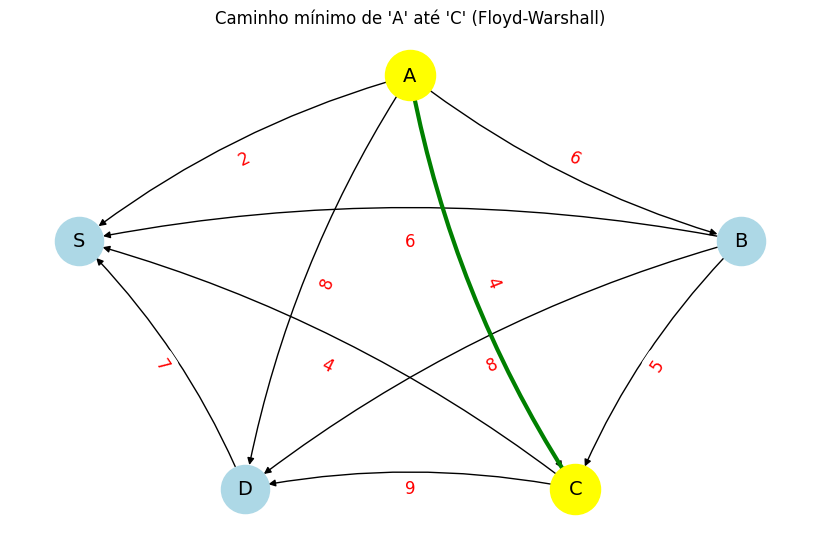

In [13]:
def floyd_warshall_setg_verbose(G, pos=None):
    labels = sorted(G.nodes)
    n = len(labels)
    inf = float('inf')
    D = np.full((n, n), inf)
    R = np.full((n, n), None, dtype=object)
    # Inicialização
    for i, u in enumerate(labels):
        for j, v in enumerate(labels):
            if u == v:
                D[i, j] = 0
                R[i, j] = None
            elif G.has_edge(u, v):
                D[i, j] = G[u][v]['weight']
                R[i, j] = u
            else:
                D[i, j] = inf
                R[i, j] = None

    # Passo 0: Matriz inicial
    print(f"\nPasso k = 0 (inicial):")
    print("Matriz de custos D:")
    print("    " + "  ".join(labels))
    for i in range(n):
        linha = [f"{D[i, j]:>3}" if D[i, j] != inf else " ∞" for j in range(n)]
        print(f"{labels[i]}: " + " ".join(linha))
    print("Matriz de predecessores R:")
    print("    " + "  ".join(labels))
    for i in range(n):
        linha = [f"{R[i, j] if R[i, j] is not None else '-':>3}" for j in range(n)]
        print(f"{labels[i]}: " + " ".join(linha))
    if pos:
        plt.figure(figsize=(8,5))
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1200, font_size=14, arrows=True, connectionstyle='arc3,rad=0.1')
        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)
        plt.title("Grafo de entrada (passo 0)")
        plt.show()

    # Floyd-Warshall com visualização dos passos
    for k in range(n):
        atualizado = False
        for i in range(n):
            for j in range(n):
                if D[i, k] + D[k, j] < D[i, j]:
                    D[i, j] = D[i, k] + D[k, j]
                    R[i, j] = R[k, j]
                    atualizado = True
        print(f"\nPasso K = {k+1} (usando intermediário '{labels[k]}'):")
        print("Matriz de custos D:")
        print("    " + "  ".join(labels))
        for i in range(n):
            linha = [f"{D[i, j]:>3}" if D[i, j] != inf else " ∞" for j in range(n)]
            print(f"{labels[i]}: " + " ".join(linha))
        print("Matriz de predecessores R:")
        print("    " + "  ".join(labels))
        for i in range(n):
            linha = [f"{R[i, j] if R[i, j] is not None else '-':>3}" for j in range(n)]
            print(f"{labels[i]}: " + " ".join(linha))
        if pos and atualizado:
            plt.figure(figsize=(8,5))
            nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1200, font_size=14, arrows=True, connectionstyle='arc3,rad=0.1')
            
            edge_labels = nx.get_edge_attributes(G, 'weight')
            nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)
            plt.title(f"Grafo após passo {k+1} (intermediário '{labels[k]}')")
            plt.show()
    return D, R, labels




def imprime_caminho_matriz(R, labels, vi, vj):
    """
    Imprime o caminho mínimo de vi até vj usando a matriz de roteamento R.
    Retorna o caminho como lista para plotagem.
    """
    i = labels.index(vi)
    j = labels.index(vj)
    if vi == vj:
        print(vi, end='')
        return [vi]
    elif R[i, j] is None:
        print(f"não existe caminho de {vi} para {vj}")
        return []
    else:
        caminho = imprime_caminho_matriz(R, labels, vi, R[i, j])
        print(f" → {vj}", end='')
        return caminho + [vj]



# Exemplo de grafo com pesos (pode ser dirigido ou não dirigido)
G = nx.DiGraph()
arestas = [ ('A', 'B', 6), ('A', 'C', 4), ('A', 'D', 8), ('A', 'S', 2),  ('B', 'C', 5), ('B', 'D', 8), ('B', 'S', 6), ('C', 'D', 9), ('C', 'S', 4), ('D', 'S', 7)]
# Defina a posição fixa dos vértices
pos = {
   'A': (0, 5),
    'B': (4, 3),
    'C': (2, 0),
    'D': (-2, 0),
    'S': (-4, 3)
}

for u, v, w in arestas:
    G.add_edge(u, v, weight=w)


D, R, labels = floyd_warshall_setg_verbose(G, pos)

vi = 'A'
vj = 'C'
# Exemplo de uso:
print(f"Caminho mínimo de {vi} até {vj}:")
caminho = imprime_caminho_matriz(R, labels, vi, vj)
print()  # Nova linha


# ...código anterior...
# Plot do caminho mínimo de vi até vj
if len(caminho) > 1:
    plt.figure(figsize=(8,5))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1200, font_size=14, arrows=True, connectionstyle='arc3,rad=0.1')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'), font_color='red', font_size=12)
    path_edges = list(zip(caminho, caminho[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='green', width=3, connectionstyle='arc3,rad=0.1')
    nx.draw_networkx_nodes(G, pos, nodelist=caminho, node_color='yellow', node_size=1300)
    plt.title(f"Caminho mínimo de '{vi}' até '{vj}' (Floyd-Warshall)")
    plt.show()
else:
    print("Não existe caminho para plotar.")
# ...código posterior...

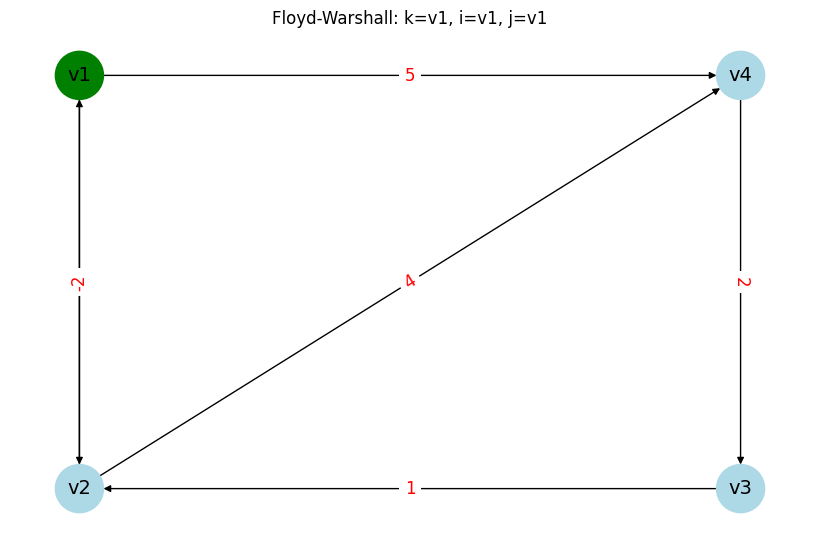

Passo: k=v1, i=v1, j=v1
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 4.0
v3:  ∞ 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v2
v3:   -  v3   -   -
v4:   -   -  v4   -
----------------------------------------


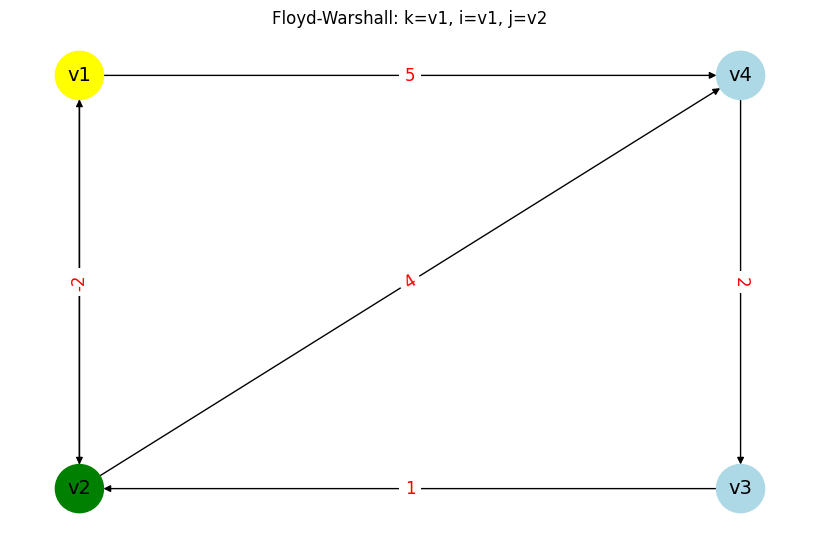

Passo: k=v1, i=v1, j=v2
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 4.0
v3:  ∞ 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v2
v3:   -  v3   -   -
v4:   -   -  v4   -
----------------------------------------


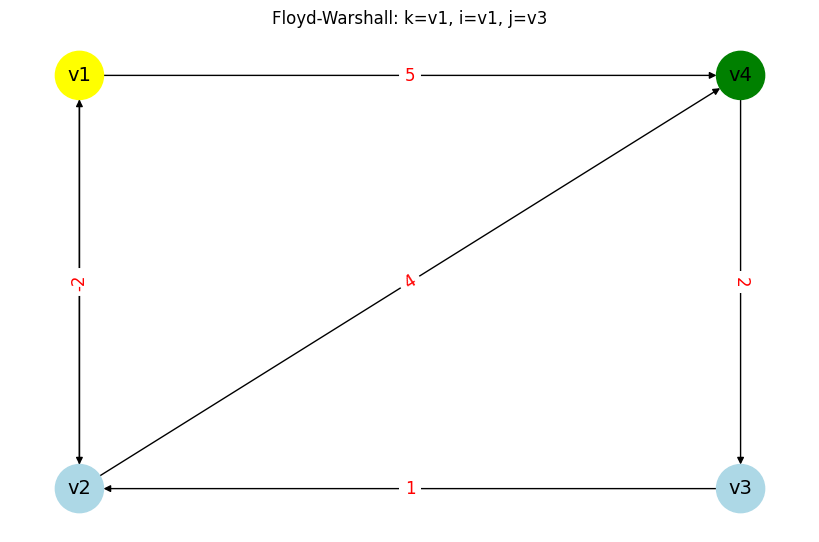

Passo: k=v1, i=v1, j=v3
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 4.0
v3:  ∞ 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v2
v3:   -  v3   -   -
v4:   -   -  v4   -
----------------------------------------


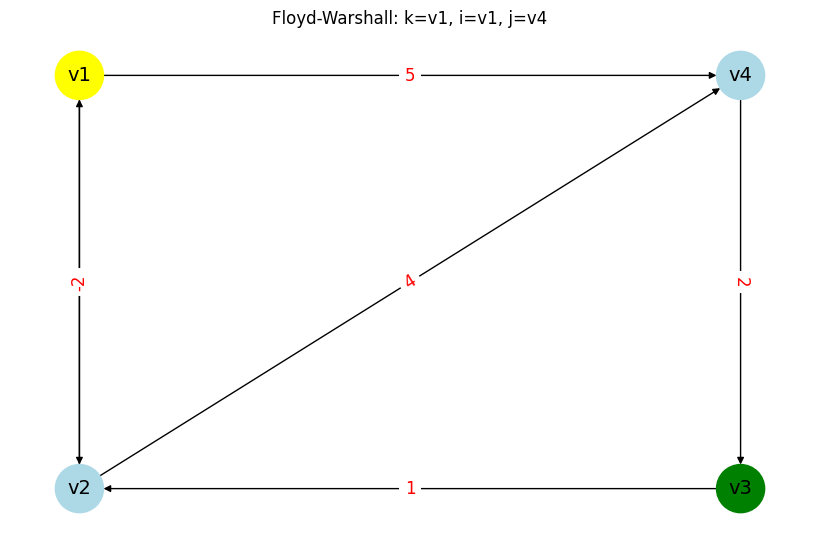

Passo: k=v1, i=v1, j=v4
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 4.0
v3:  ∞ 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v2
v3:   -  v3   -   -
v4:   -   -  v4   -
----------------------------------------


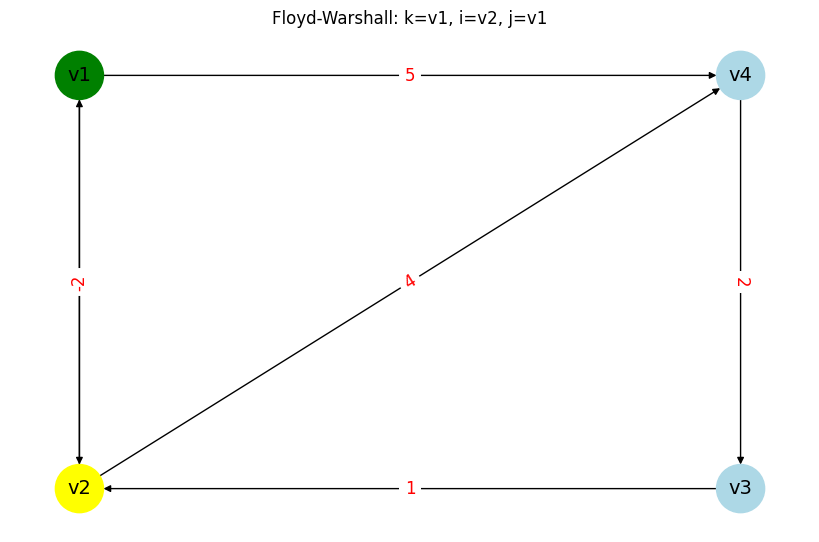

Passo: k=v1, i=v2, j=v1
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 4.0
v3:  ∞ 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v2
v3:   -  v3   -   -
v4:   -   -  v4   -
----------------------------------------


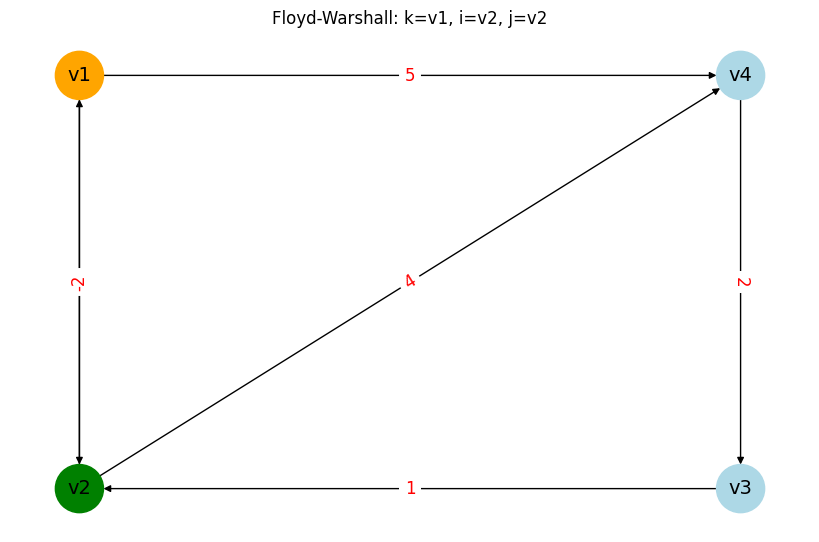

Passo: k=v1, i=v2, j=v2
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 4.0
v3:  ∞ 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v2
v3:   -  v3   -   -
v4:   -   -  v4   -
----------------------------------------


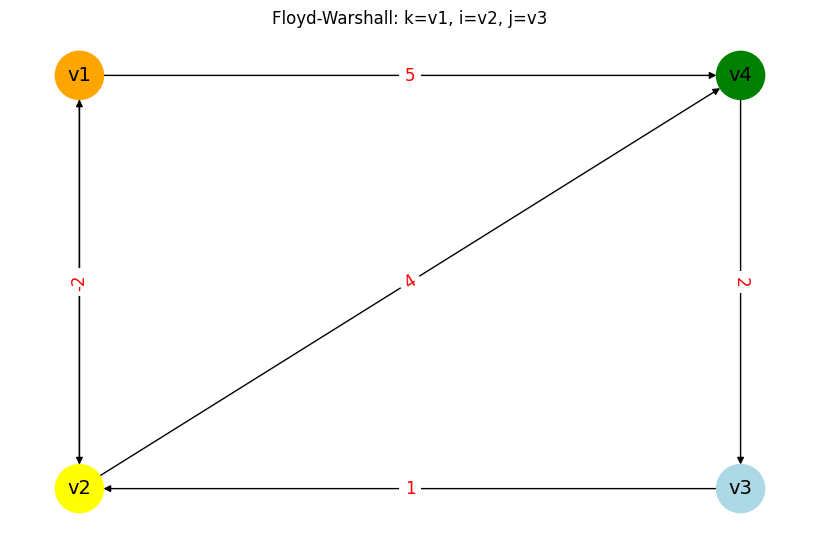

Passo: k=v1, i=v2, j=v3
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 4.0
v3:  ∞ 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v2
v3:   -  v3   -   -
v4:   -   -  v4   -
----------------------------------------


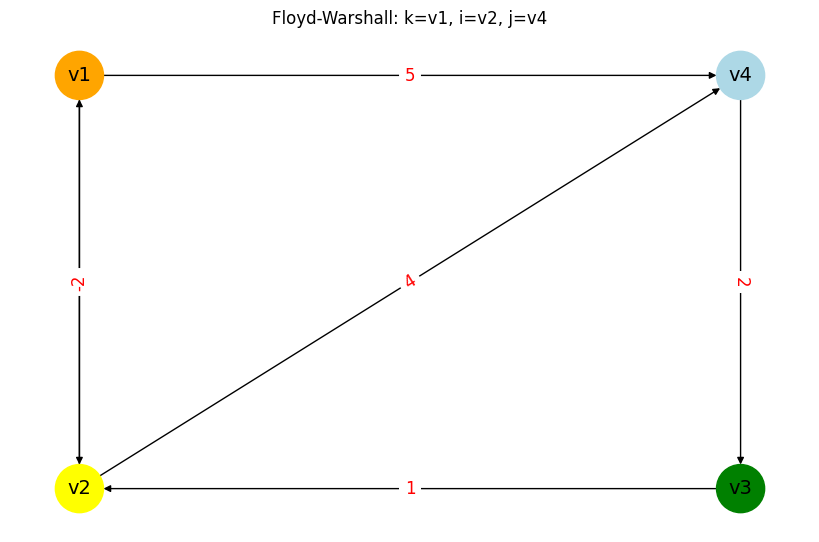

Passo: k=v1, i=v2, j=v4
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3:  ∞ 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:   -  v3   -   -
v4:   -   -  v4   -
----------------------------------------


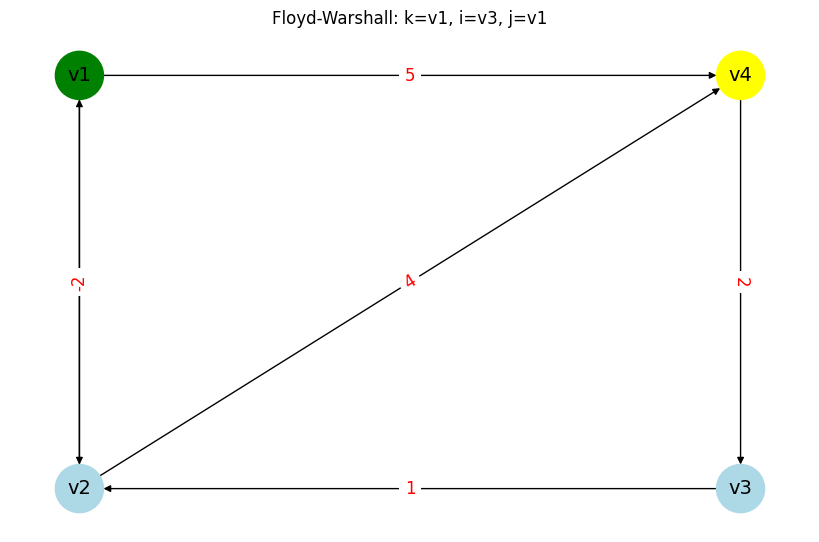

Passo: k=v1, i=v3, j=v1
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3:  ∞ 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:   -  v3   -   -
v4:   -   -  v4   -
----------------------------------------


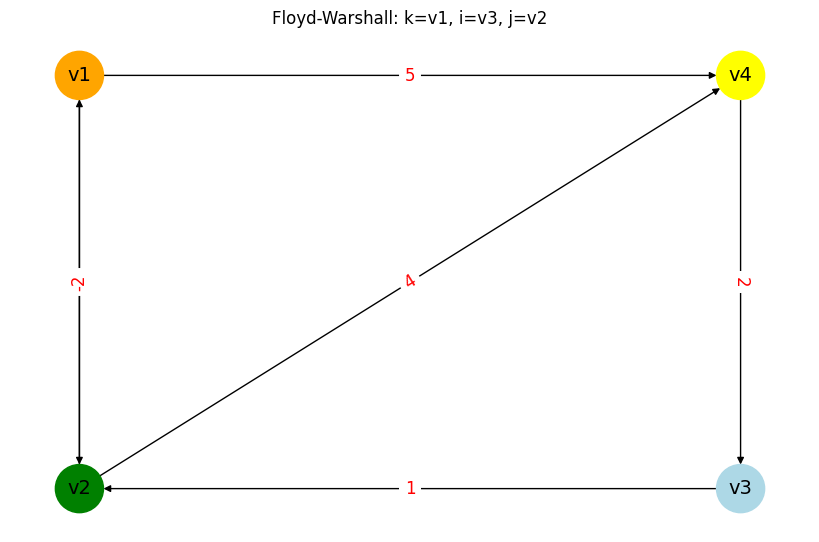

Passo: k=v1, i=v3, j=v2
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3:  ∞ 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:   -  v3   -   -
v4:   -   -  v4   -
----------------------------------------


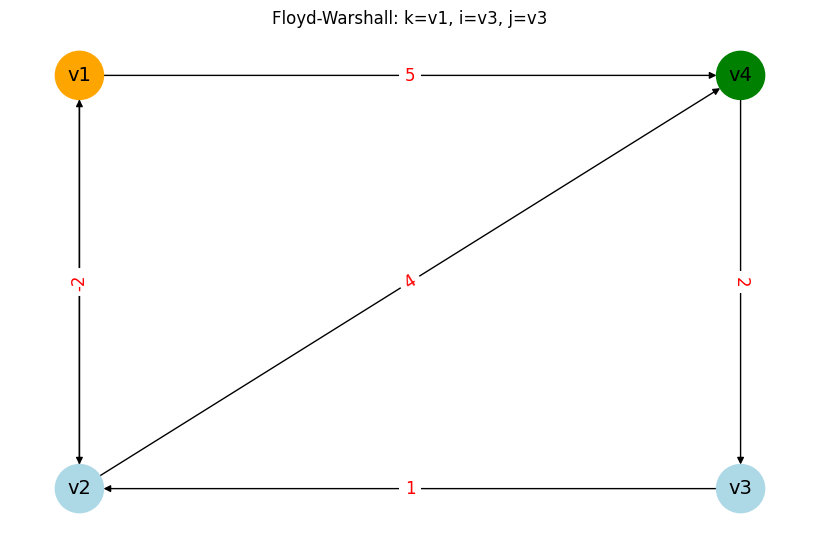

Passo: k=v1, i=v3, j=v3
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3:  ∞ 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:   -  v3   -   -
v4:   -   -  v4   -
----------------------------------------


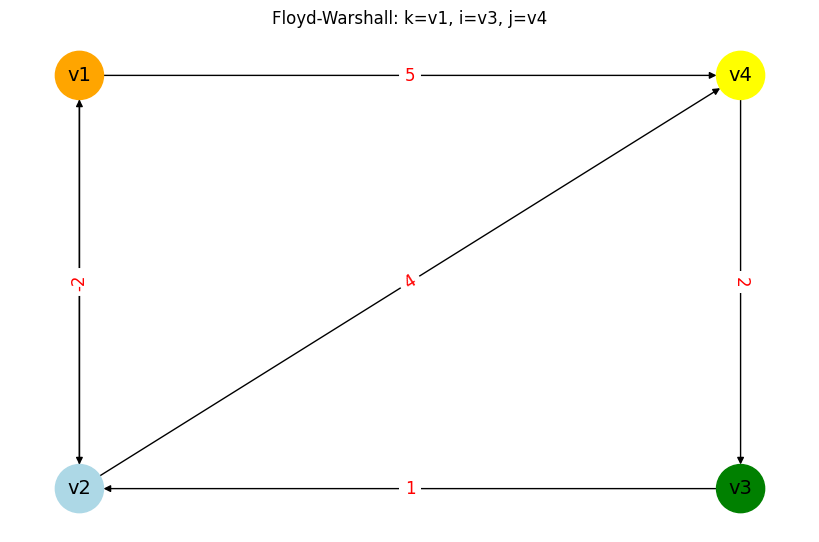

Passo: k=v1, i=v3, j=v4
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3:  ∞ 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:   -  v3   -   -
v4:   -   -  v4   -
----------------------------------------


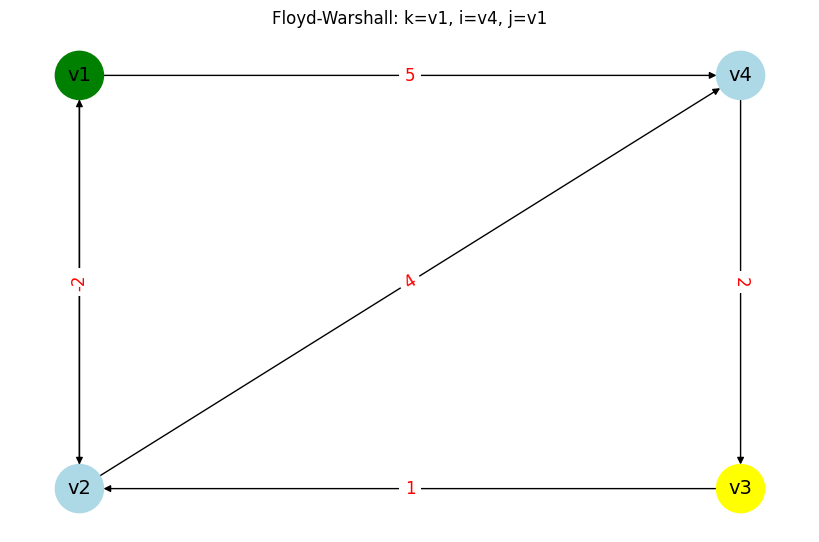

Passo: k=v1, i=v4, j=v1
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3:  ∞ 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:   -  v3   -   -
v4:   -   -  v4   -
----------------------------------------


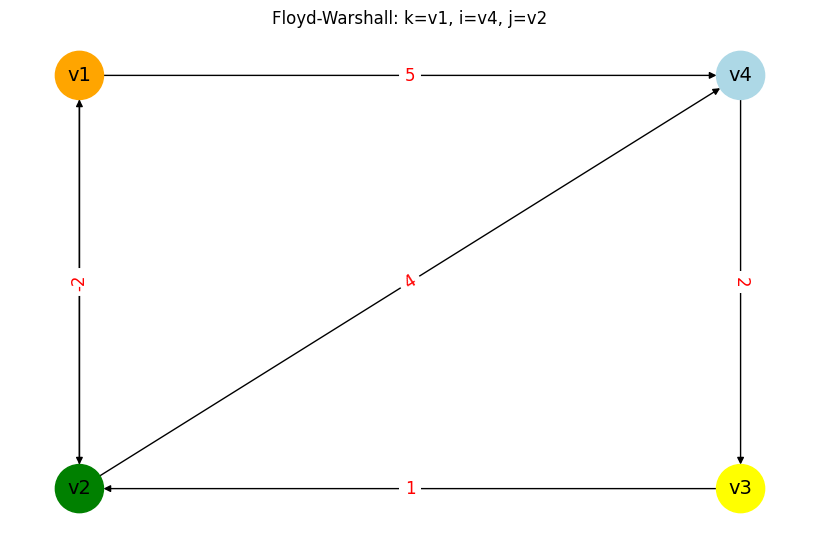

Passo: k=v1, i=v4, j=v2
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3:  ∞ 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:   -  v3   -   -
v4:   -   -  v4   -
----------------------------------------


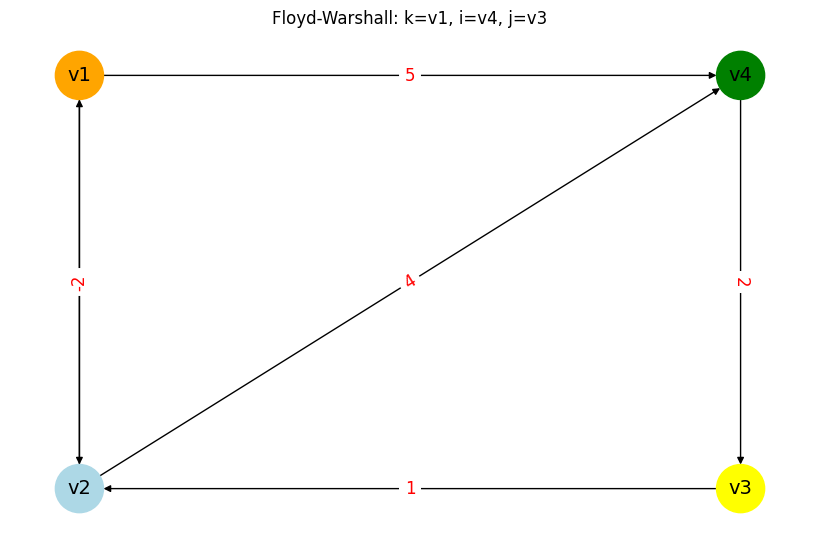

Passo: k=v1, i=v4, j=v3
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3:  ∞ 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:   -  v3   -   -
v4:   -   -  v4   -
----------------------------------------


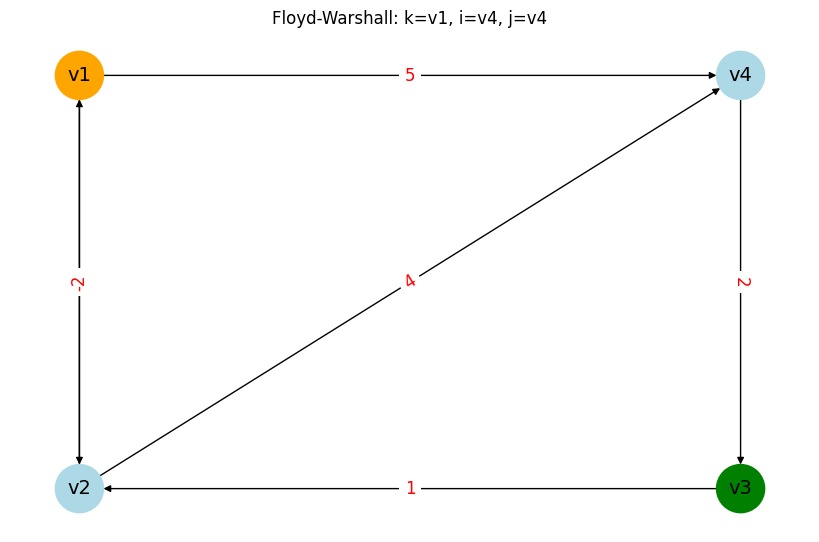

Passo: k=v1, i=v4, j=v4
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3:  ∞ 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:   -  v3   -   -
v4:   -   -  v4   -
----------------------------------------


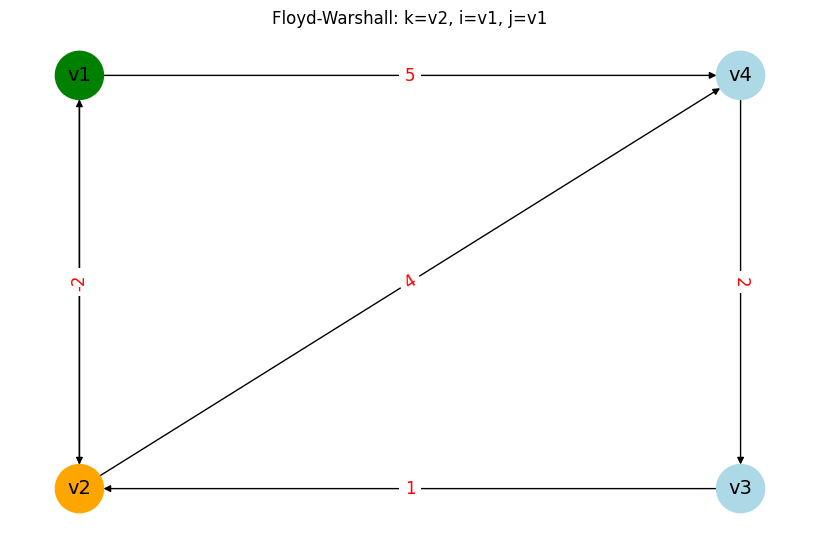

Passo: k=v2, i=v1, j=v1
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3:  ∞ 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:   -  v3   -   -
v4:   -   -  v4   -
----------------------------------------


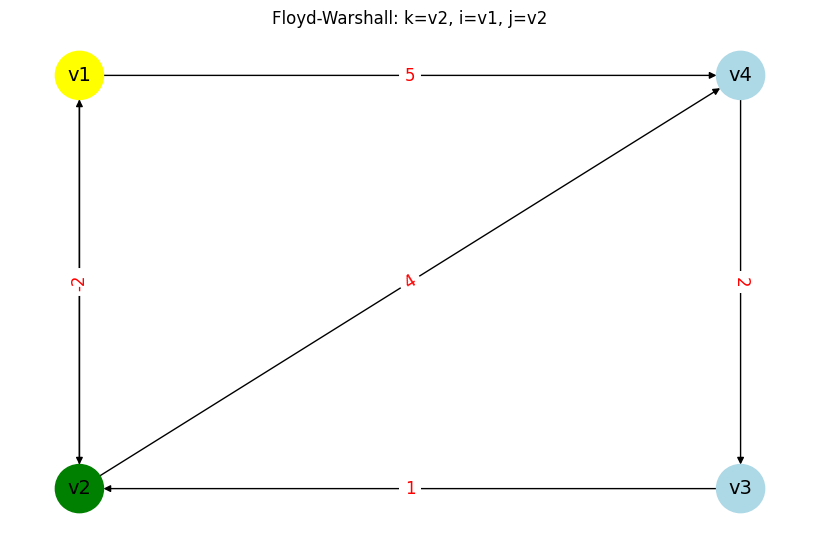

Passo: k=v2, i=v1, j=v2
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3:  ∞ 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:   -  v3   -   -
v4:   -   -  v4   -
----------------------------------------


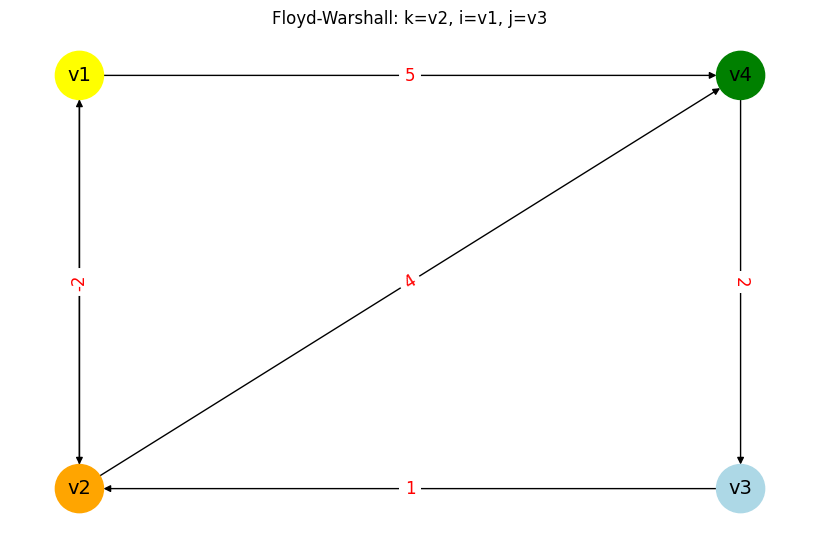

Passo: k=v2, i=v1, j=v3
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3:  ∞ 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:   -  v3   -   -
v4:   -   -  v4   -
----------------------------------------


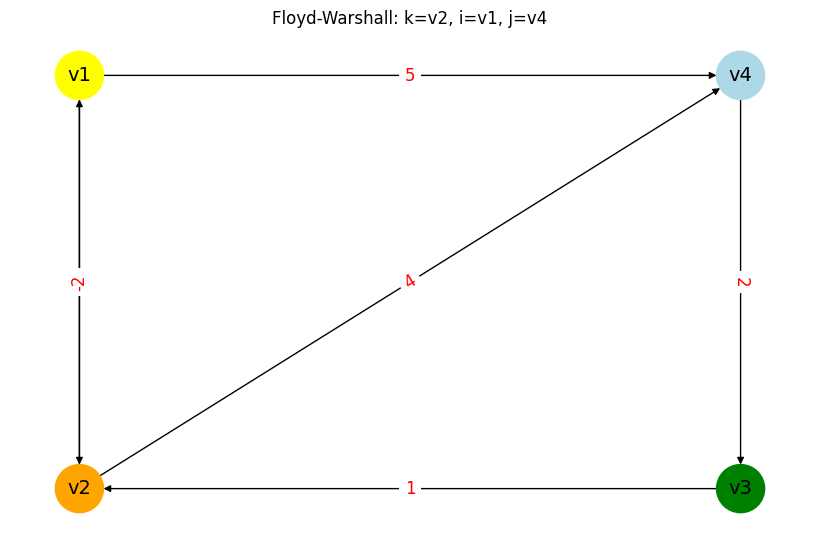

Passo: k=v2, i=v1, j=v4
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3:  ∞ 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:   -  v3   -   -
v4:   -   -  v4   -
----------------------------------------


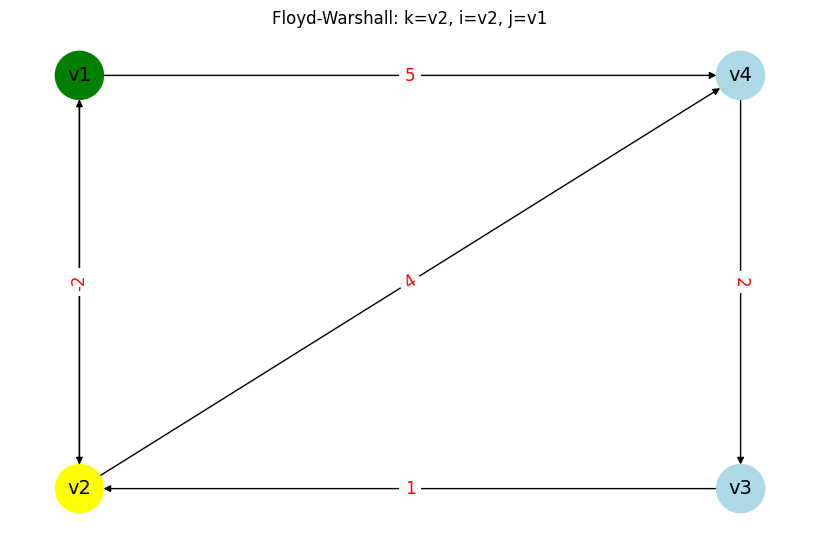

Passo: k=v2, i=v2, j=v1
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3:  ∞ 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:   -  v3   -   -
v4:   -   -  v4   -
----------------------------------------


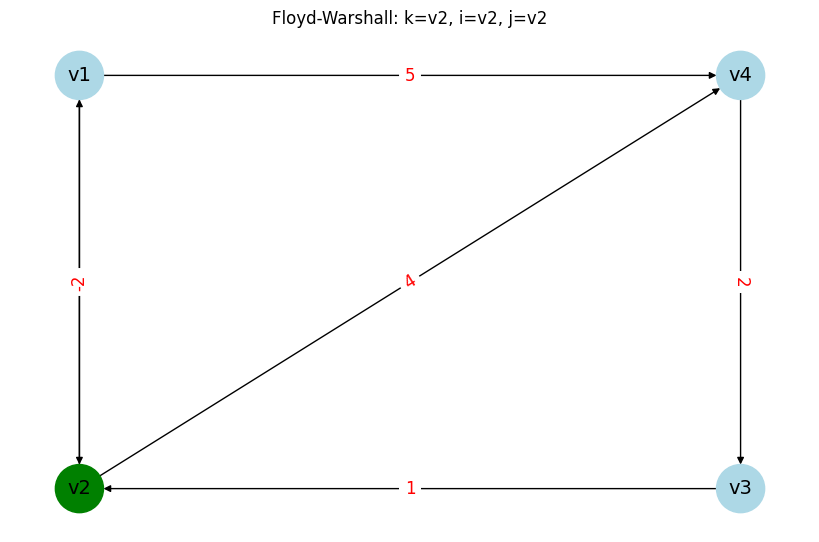

Passo: k=v2, i=v2, j=v2
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3:  ∞ 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:   -  v3   -   -
v4:   -   -  v4   -
----------------------------------------


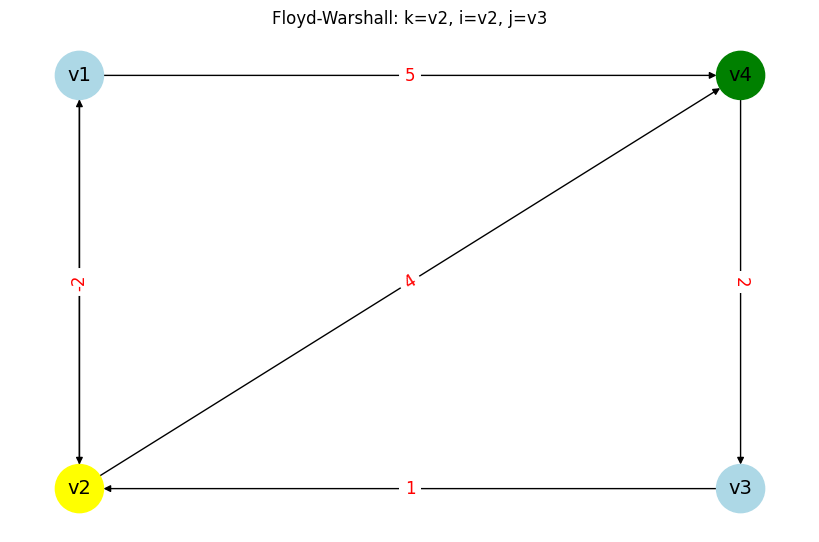

Passo: k=v2, i=v2, j=v3
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3:  ∞ 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:   -  v3   -   -
v4:   -   -  v4   -
----------------------------------------


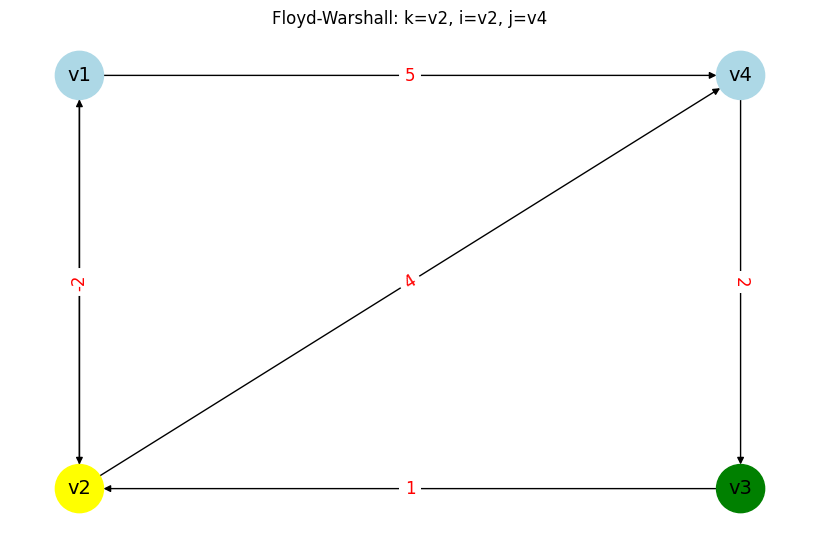

Passo: k=v2, i=v2, j=v4
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3:  ∞ 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:   -  v3   -   -
v4:   -   -  v4   -
----------------------------------------


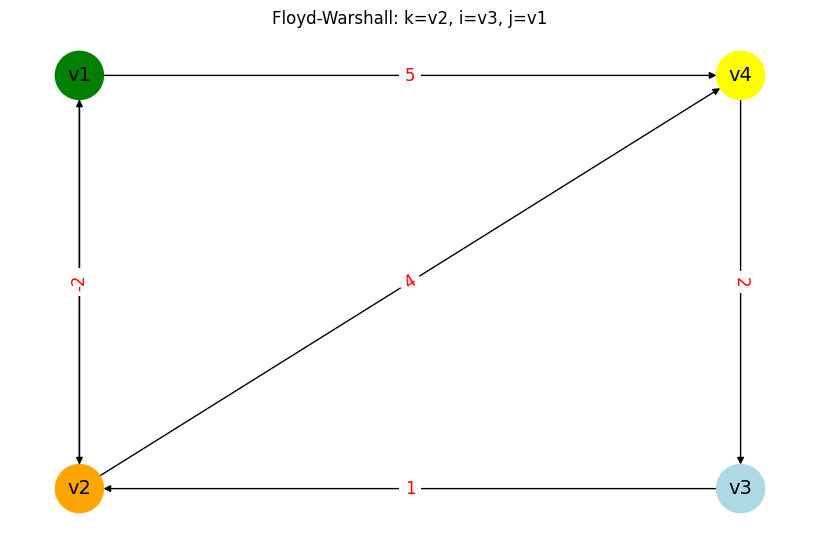

Passo: k=v2, i=v3, j=v1
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:  v2  v3   -   -
v4:   -   -  v4   -
----------------------------------------


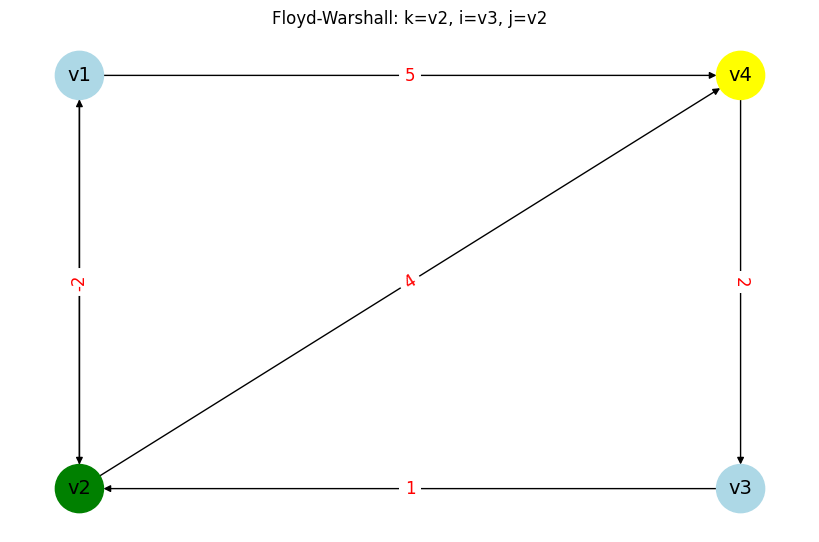

Passo: k=v2, i=v3, j=v2
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:  v2  v3   -   -
v4:   -   -  v4   -
----------------------------------------


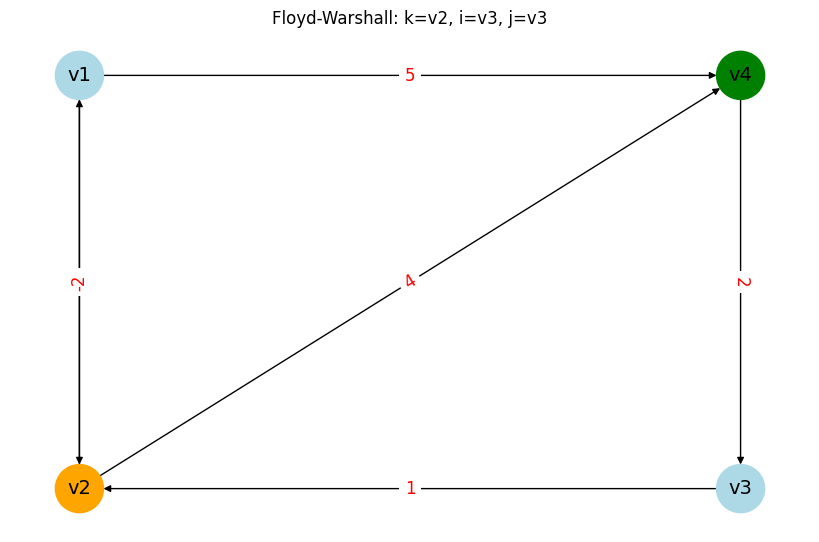

Passo: k=v2, i=v3, j=v3
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:  v2  v3   -   -
v4:   -   -  v4   -
----------------------------------------


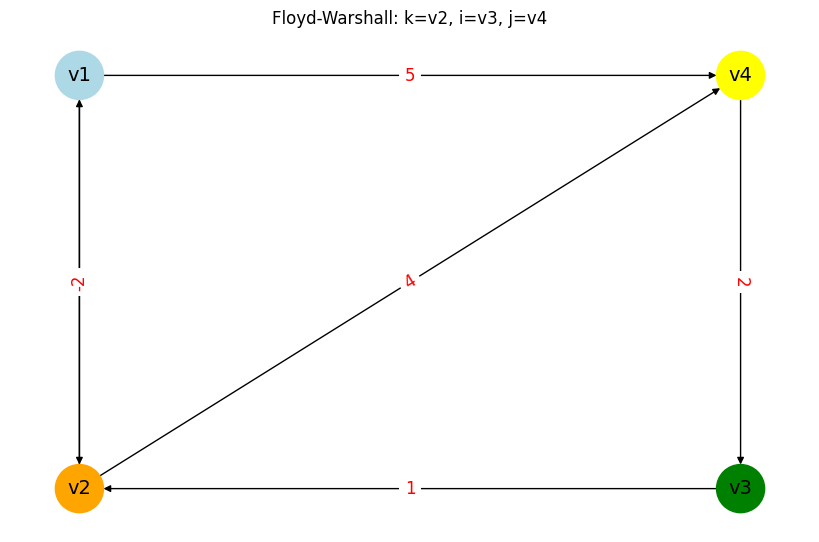

Passo: k=v2, i=v3, j=v4
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:   -   -  v4   -
----------------------------------------


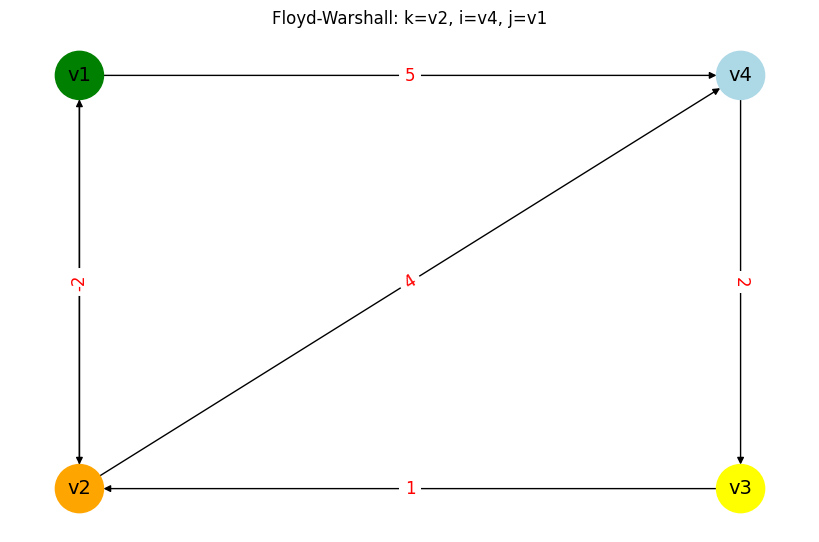

Passo: k=v2, i=v4, j=v1
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:   -   -  v4   -
----------------------------------------


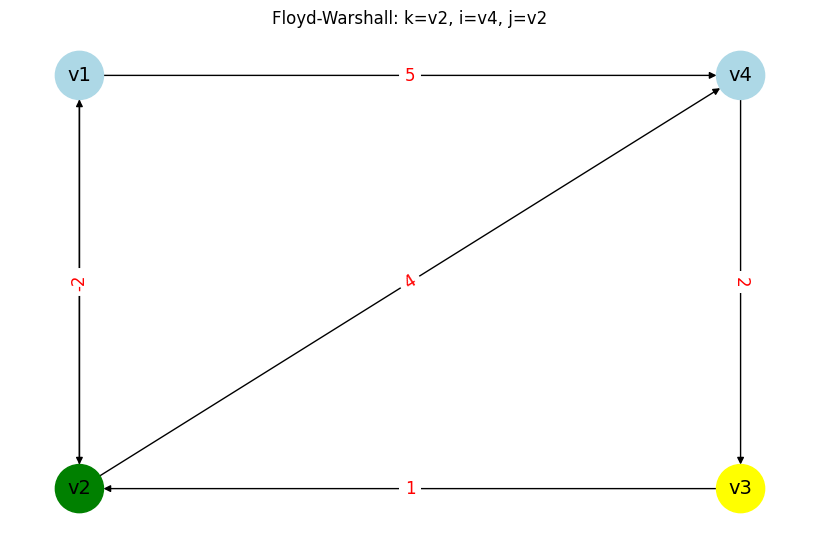

Passo: k=v2, i=v4, j=v2
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:   -   -  v4   -
----------------------------------------


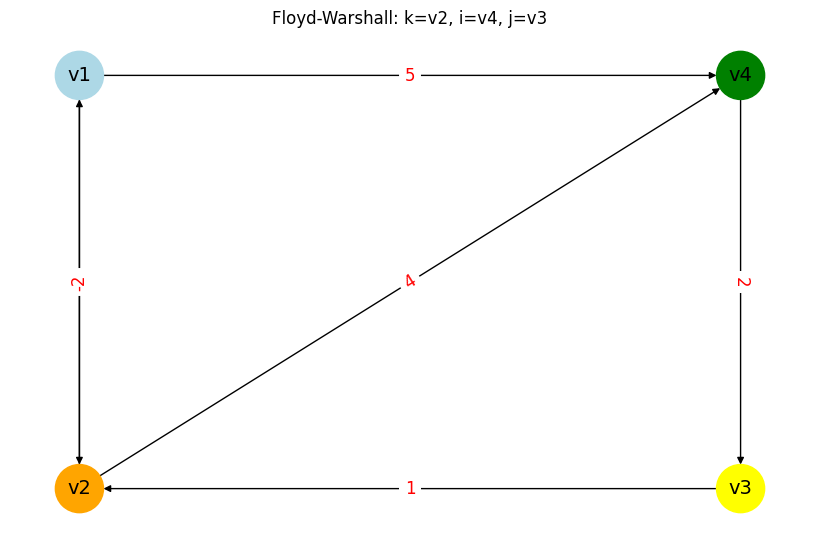

Passo: k=v2, i=v4, j=v3
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:   -   -  v4   -
----------------------------------------


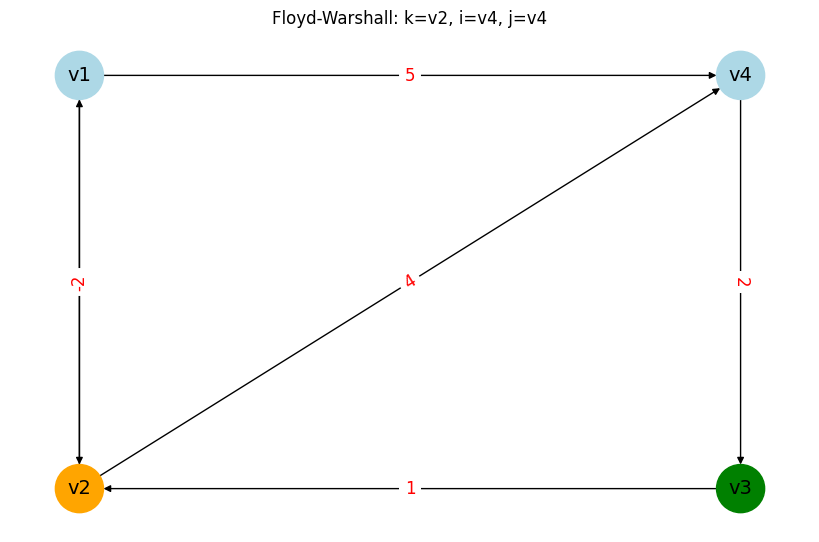

Passo: k=v2, i=v4, j=v4
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:   -   -  v4   -
----------------------------------------


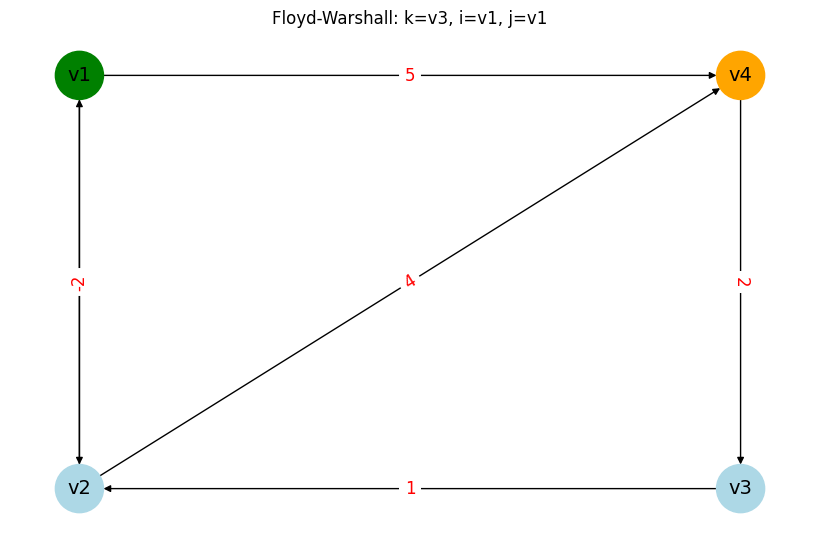

Passo: k=v3, i=v1, j=v1
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:   -   -  v4   -
----------------------------------------


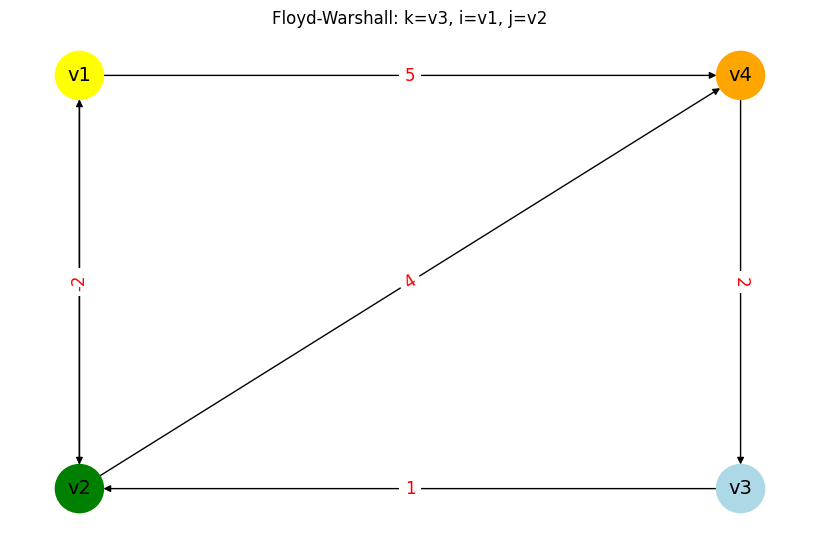

Passo: k=v3, i=v1, j=v2
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:   -   -  v4   -
----------------------------------------


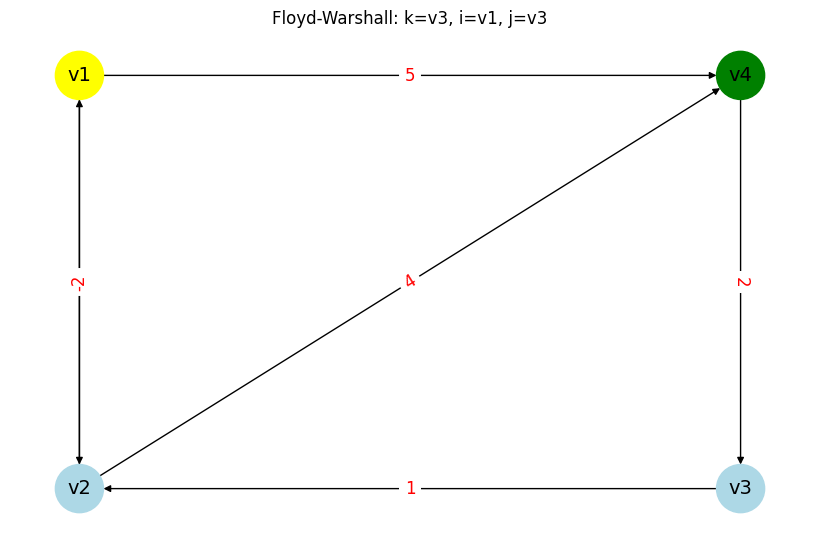

Passo: k=v3, i=v1, j=v3
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:   -   -  v4   -
----------------------------------------


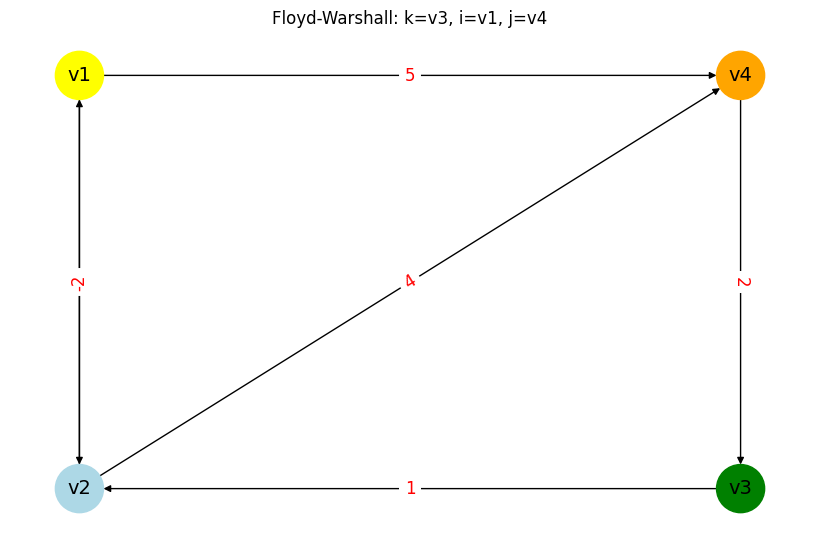

Passo: k=v3, i=v1, j=v4
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:   -   -  v4   -
----------------------------------------


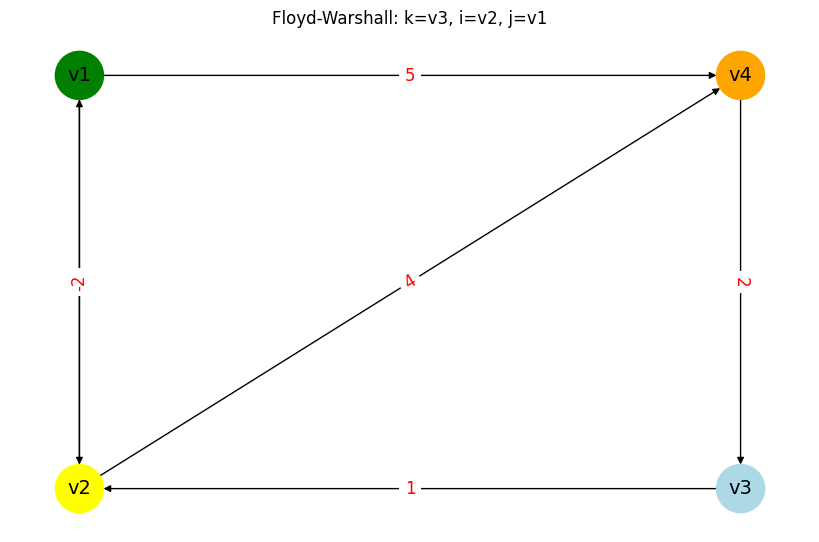

Passo: k=v3, i=v2, j=v1
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:   -   -  v4   -
----------------------------------------


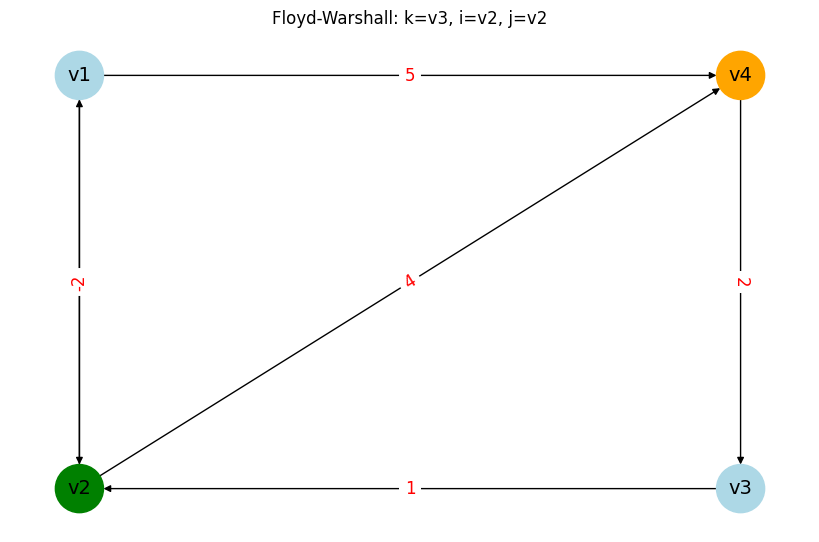

Passo: k=v3, i=v2, j=v2
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:   -   -  v4   -
----------------------------------------


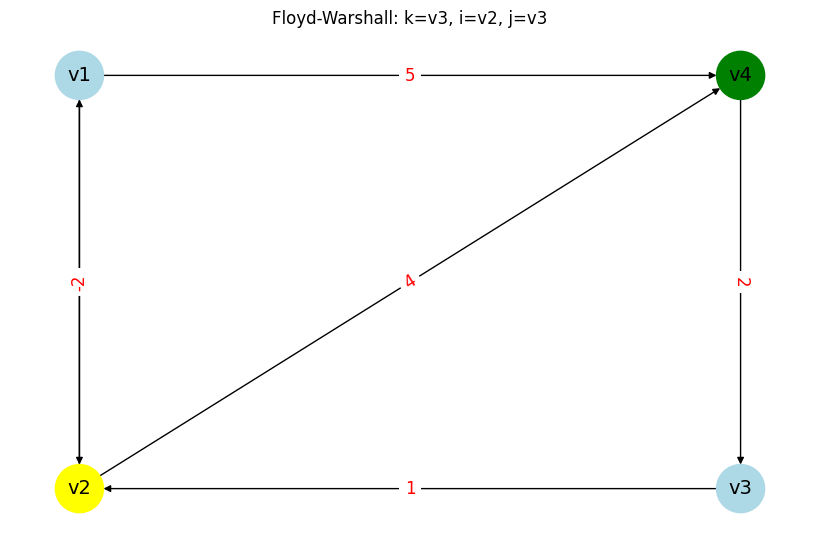

Passo: k=v3, i=v2, j=v3
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:   -   -  v4   -
----------------------------------------


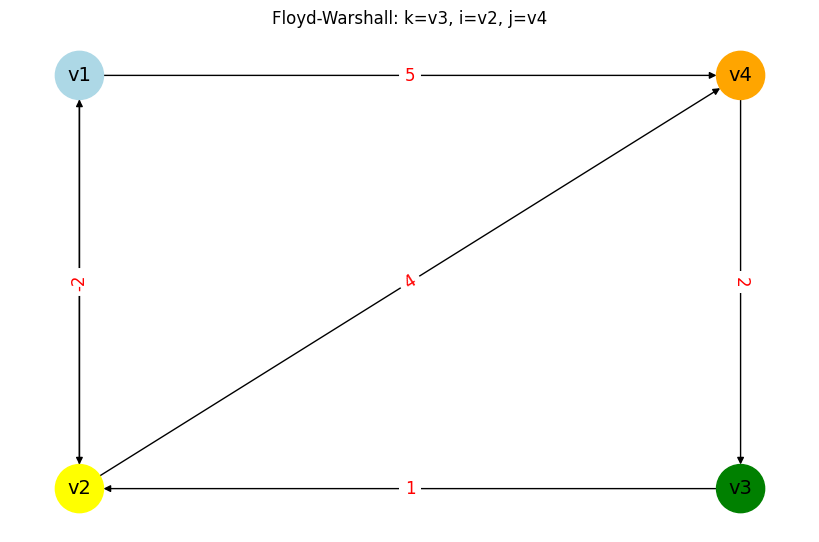

Passo: k=v3, i=v2, j=v4
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:   -   -  v4   -
----------------------------------------


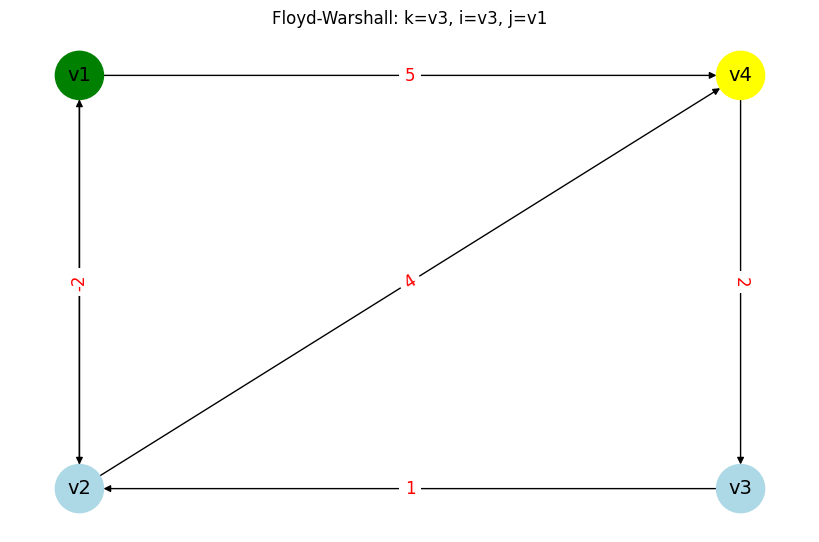

Passo: k=v3, i=v3, j=v1
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:   -   -  v4   -
----------------------------------------


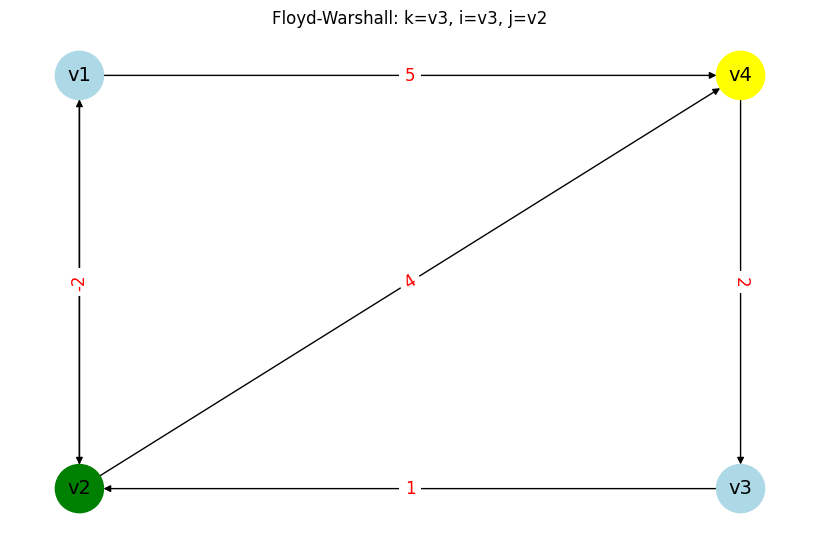

Passo: k=v3, i=v3, j=v2
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:   -   -  v4   -
----------------------------------------


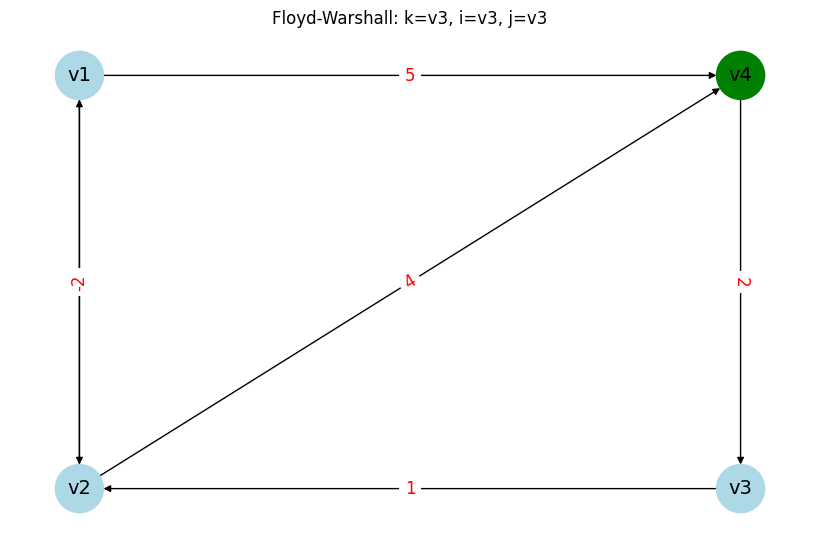

Passo: k=v3, i=v3, j=v3
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:   -   -  v4   -
----------------------------------------


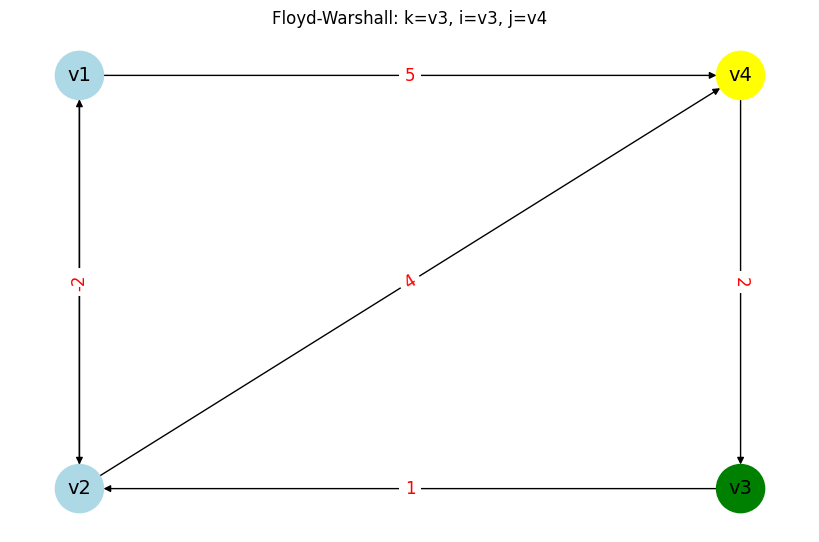

Passo: k=v3, i=v3, j=v4
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:   -   -  v4   -
----------------------------------------


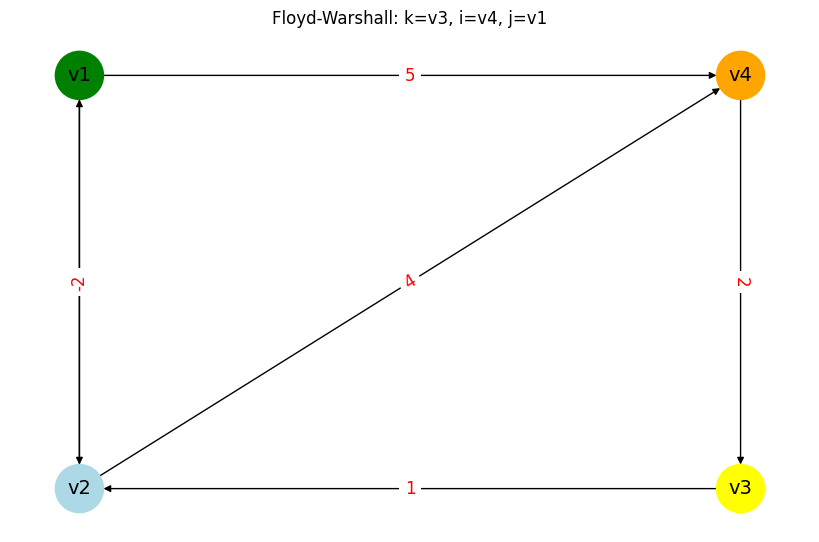

Passo: k=v3, i=v4, j=v1
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4: 1.0  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:  v2   -  v4   -
----------------------------------------


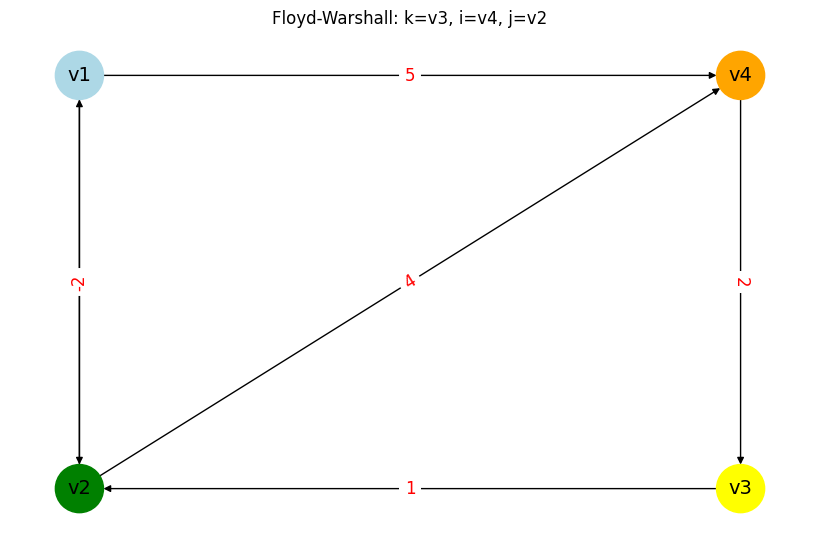

Passo: k=v3, i=v4, j=v2
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4: 1.0 3.0 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:  v2  v3  v4   -
----------------------------------------


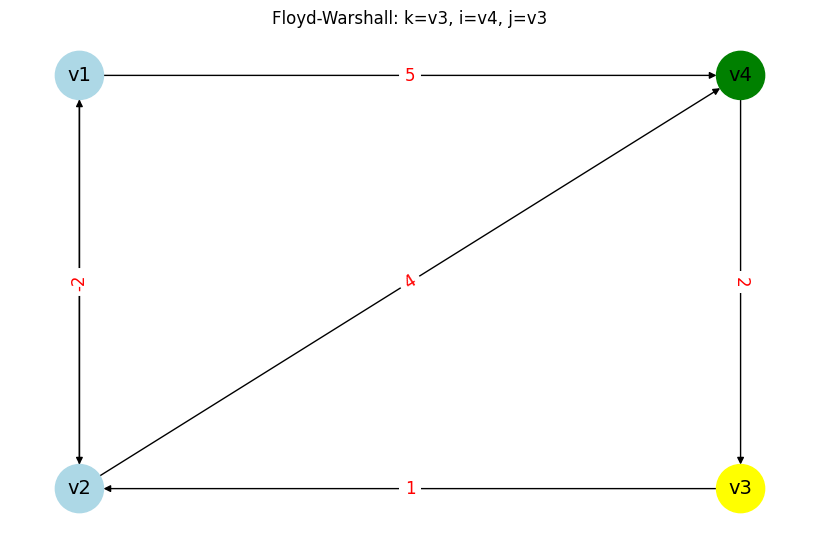

Passo: k=v3, i=v4, j=v3
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4: 1.0 3.0 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:  v2  v3  v4   -
----------------------------------------


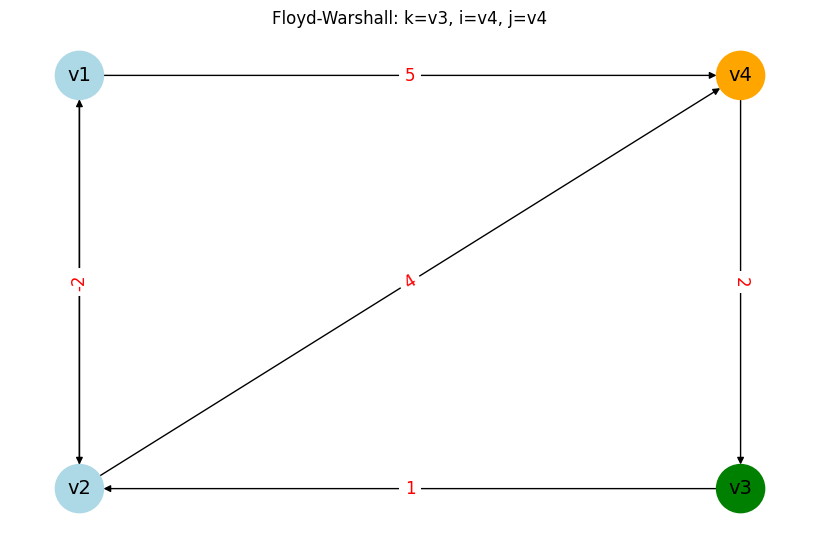

Passo: k=v3, i=v4, j=v4
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4: 1.0 3.0 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:  v2  v3  v4   -
----------------------------------------


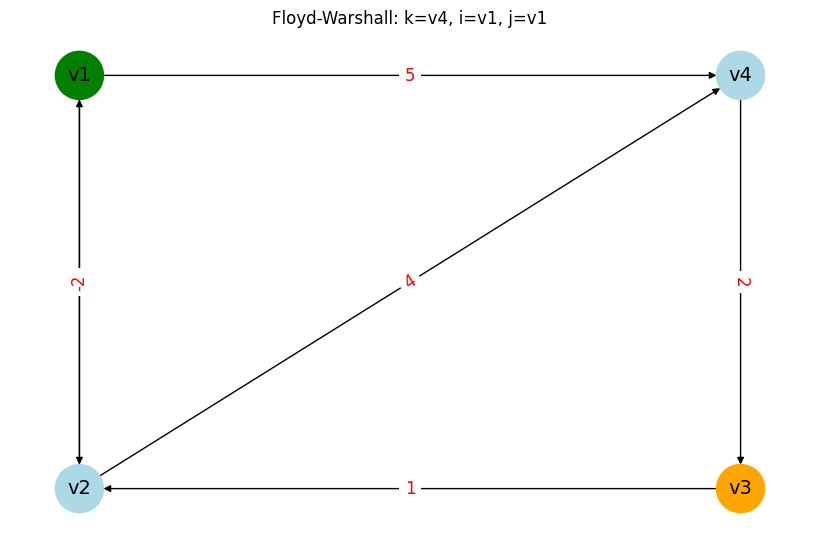

Passo: k=v4, i=v1, j=v1
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4: 1.0 3.0 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:  v2  v3  v4   -
----------------------------------------


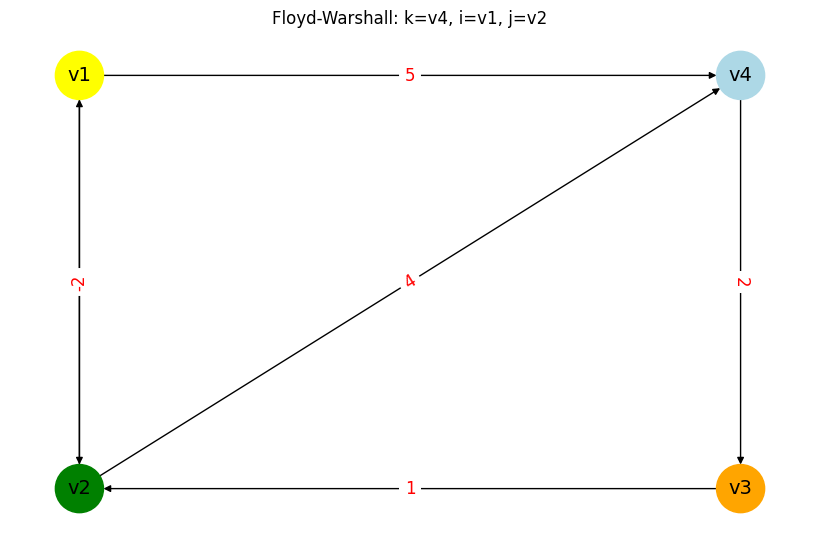

Passo: k=v4, i=v1, j=v2
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4: 1.0 3.0 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:  v2  v3  v4   -
----------------------------------------


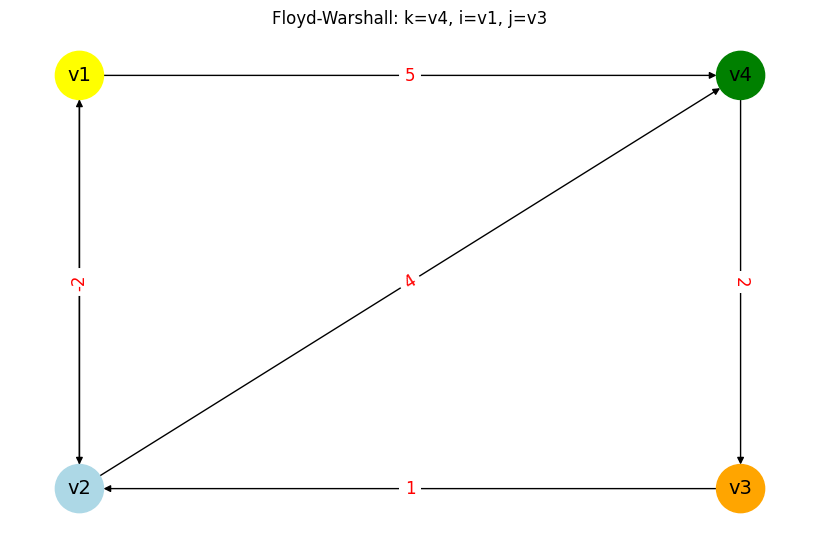

Passo: k=v4, i=v1, j=v3
Matriz de Distâncias (D):
v1: 0.0 3.0 7.0 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4: 1.0 3.0 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1  v4  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:  v2  v3  v4   -
----------------------------------------


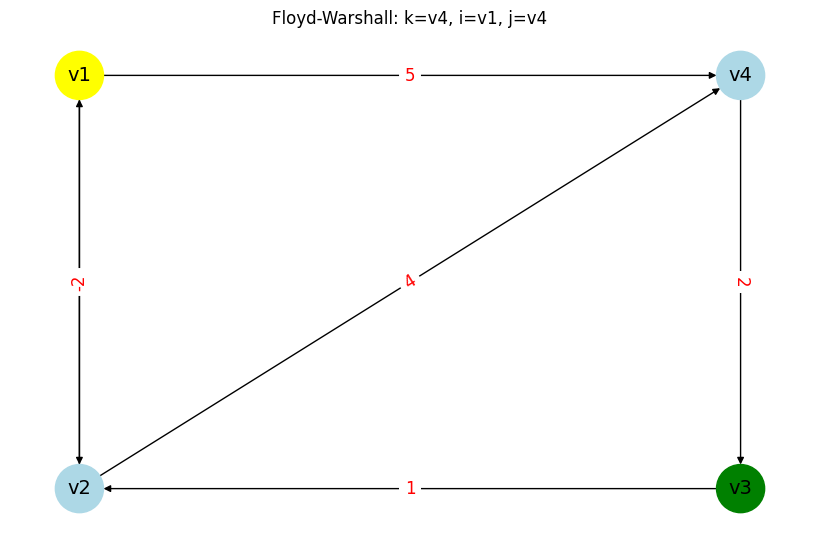

Passo: k=v4, i=v1, j=v4
Matriz de Distâncias (D):
v1: 0.0 3.0 7.0 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4: 1.0 3.0 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1  v4  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:  v2  v3  v4   -
----------------------------------------


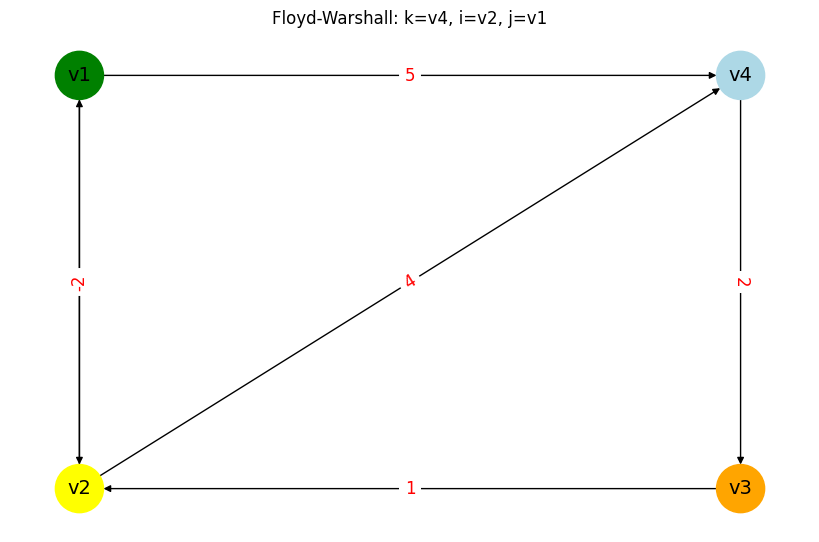

Passo: k=v4, i=v2, j=v1
Matriz de Distâncias (D):
v1: 0.0 3.0 7.0 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4: 1.0 3.0 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1  v4  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:  v2  v3  v4   -
----------------------------------------


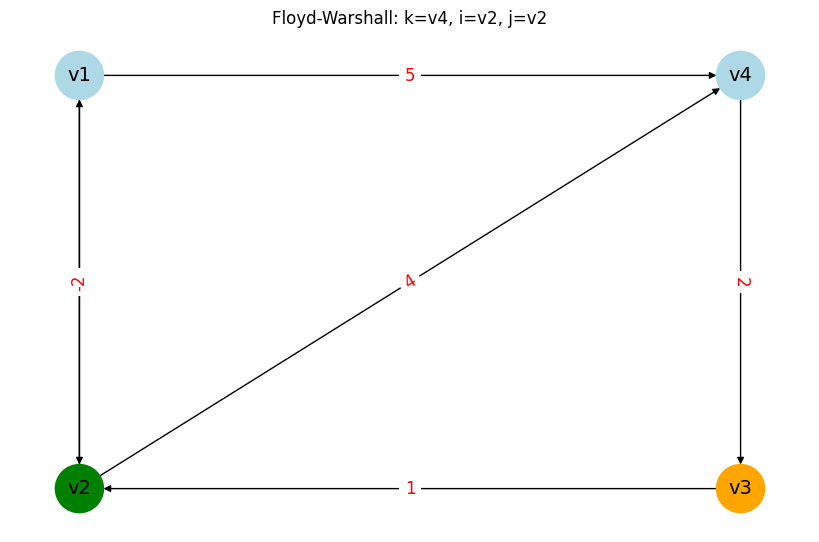

Passo: k=v4, i=v2, j=v2
Matriz de Distâncias (D):
v1: 0.0 3.0 7.0 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4: 1.0 3.0 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1  v4  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:  v2  v3  v4   -
----------------------------------------


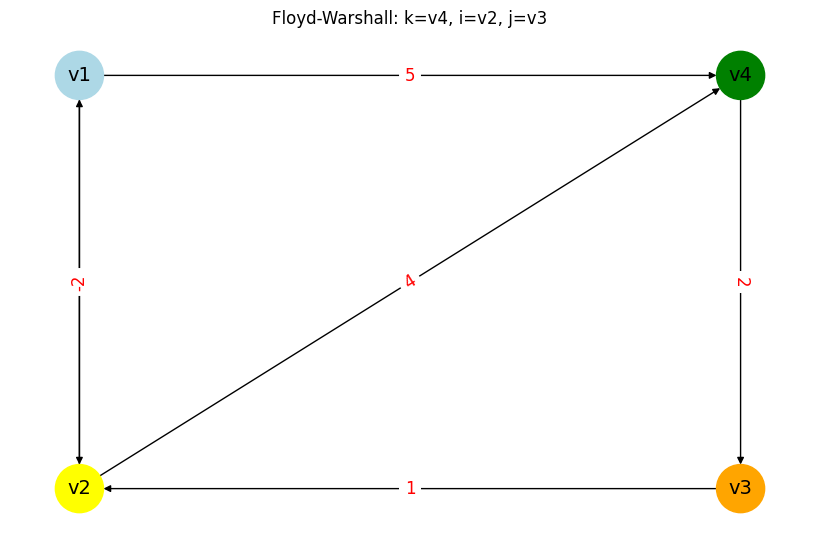

Passo: k=v4, i=v2, j=v3
Matriz de Distâncias (D):
v1: 0.0 3.0 7.0 5.0
v2: -2.0 0.0 5.0 3.0
v3: -1.0 1.0 0.0 4.0
v4: 1.0 3.0 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1  v4  v1
v2:  v2   -  v4  v1
v3:  v2  v3   -  v1
v4:  v2  v3  v4   -
----------------------------------------


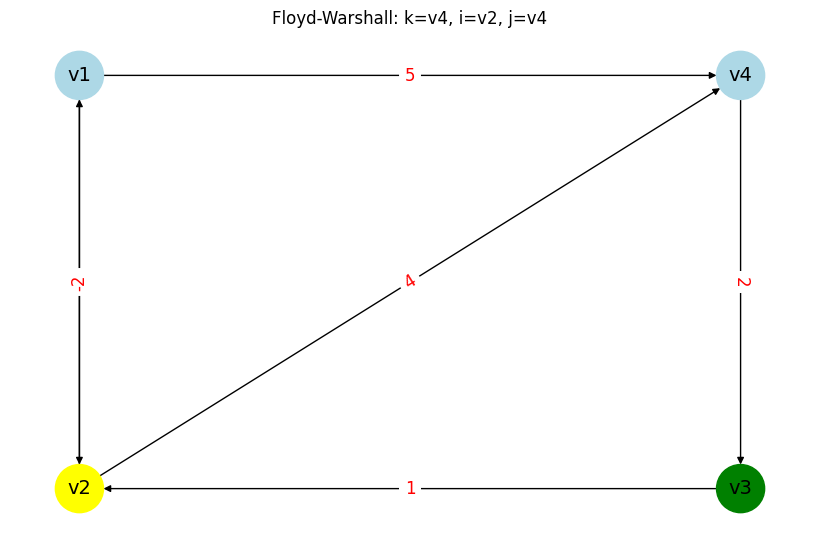

Passo: k=v4, i=v2, j=v4
Matriz de Distâncias (D):
v1: 0.0 3.0 7.0 5.0
v2: -2.0 0.0 5.0 3.0
v3: -1.0 1.0 0.0 4.0
v4: 1.0 3.0 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1  v4  v1
v2:  v2   -  v4  v1
v3:  v2  v3   -  v1
v4:  v2  v3  v4   -
----------------------------------------


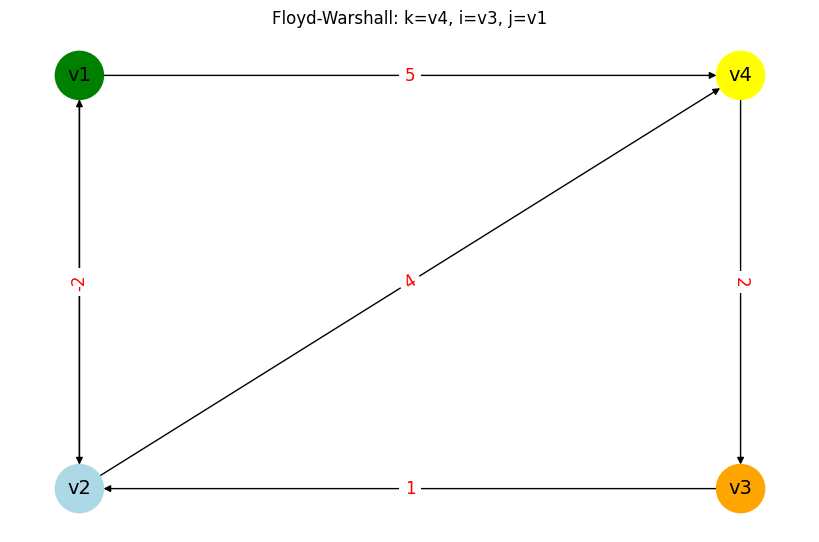

Passo: k=v4, i=v3, j=v1
Matriz de Distâncias (D):
v1: 0.0 3.0 7.0 5.0
v2: -2.0 0.0 5.0 3.0
v3: -1.0 1.0 0.0 4.0
v4: 1.0 3.0 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1  v4  v1
v2:  v2   -  v4  v1
v3:  v2  v3   -  v1
v4:  v2  v3  v4   -
----------------------------------------


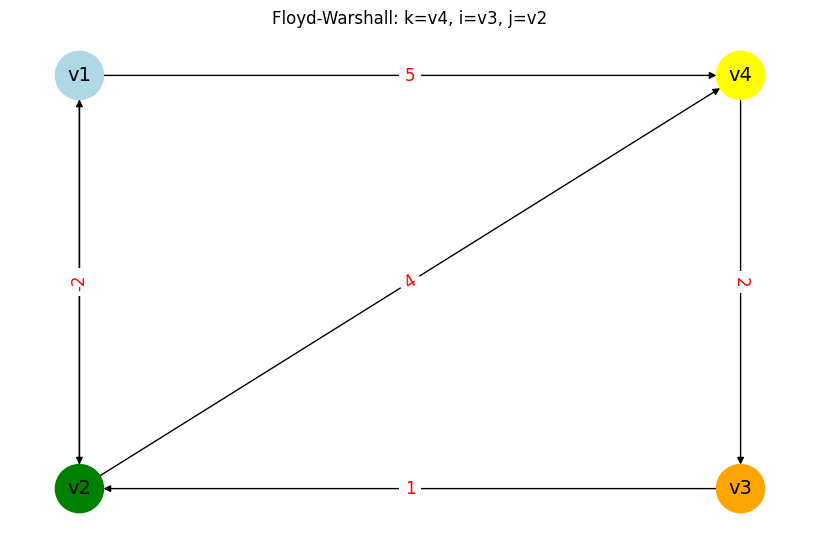

Passo: k=v4, i=v3, j=v2
Matriz de Distâncias (D):
v1: 0.0 3.0 7.0 5.0
v2: -2.0 0.0 5.0 3.0
v3: -1.0 1.0 0.0 4.0
v4: 1.0 3.0 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1  v4  v1
v2:  v2   -  v4  v1
v3:  v2  v3   -  v1
v4:  v2  v3  v4   -
----------------------------------------


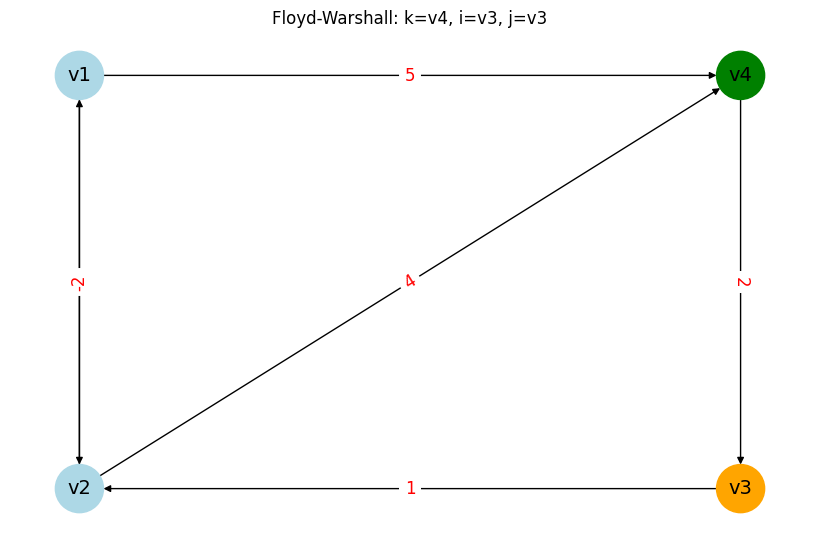

Passo: k=v4, i=v3, j=v3
Matriz de Distâncias (D):
v1: 0.0 3.0 7.0 5.0
v2: -2.0 0.0 5.0 3.0
v3: -1.0 1.0 0.0 4.0
v4: 1.0 3.0 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1  v4  v1
v2:  v2   -  v4  v1
v3:  v2  v3   -  v1
v4:  v2  v3  v4   -
----------------------------------------


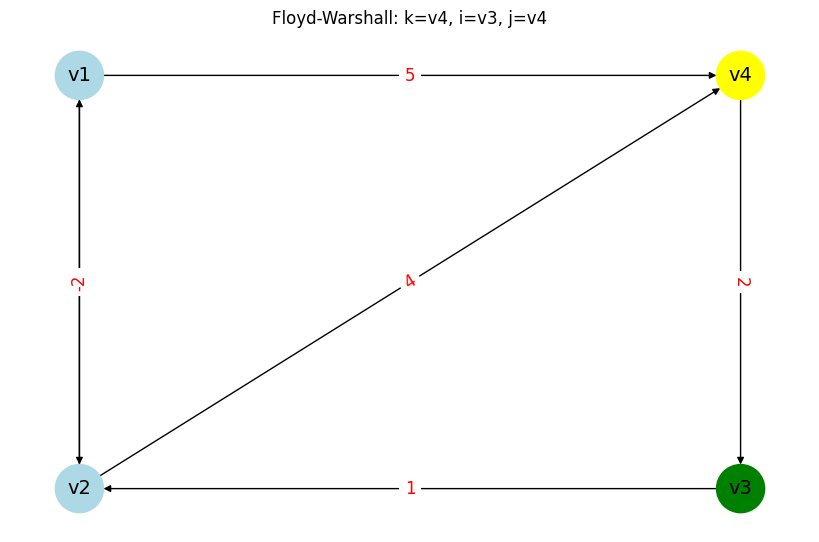

Passo: k=v4, i=v3, j=v4
Matriz de Distâncias (D):
v1: 0.0 3.0 7.0 5.0
v2: -2.0 0.0 5.0 3.0
v3: -1.0 1.0 0.0 4.0
v4: 1.0 3.0 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1  v4  v1
v2:  v2   -  v4  v1
v3:  v2  v3   -  v1
v4:  v2  v3  v4   -
----------------------------------------


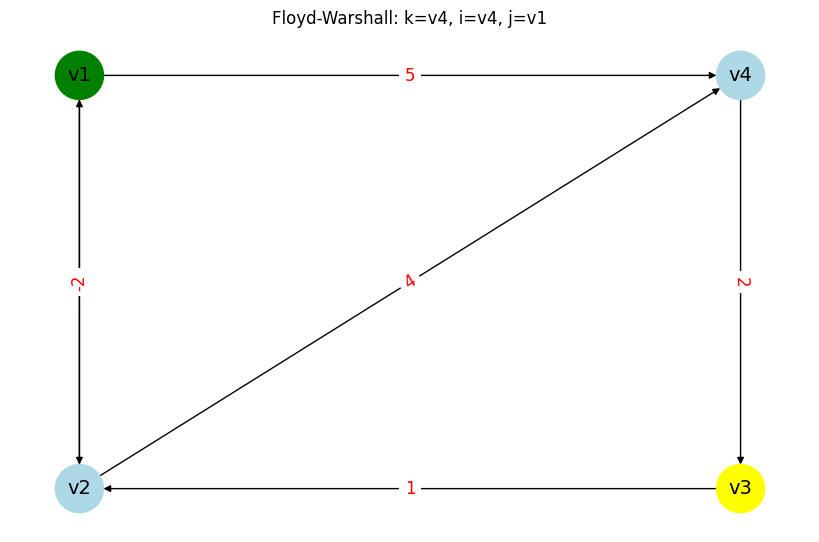

Passo: k=v4, i=v4, j=v1
Matriz de Distâncias (D):
v1: 0.0 3.0 7.0 5.0
v2: -2.0 0.0 5.0 3.0
v3: -1.0 1.0 0.0 4.0
v4: 1.0 3.0 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1  v4  v1
v2:  v2   -  v4  v1
v3:  v2  v3   -  v1
v4:  v2  v3  v4   -
----------------------------------------


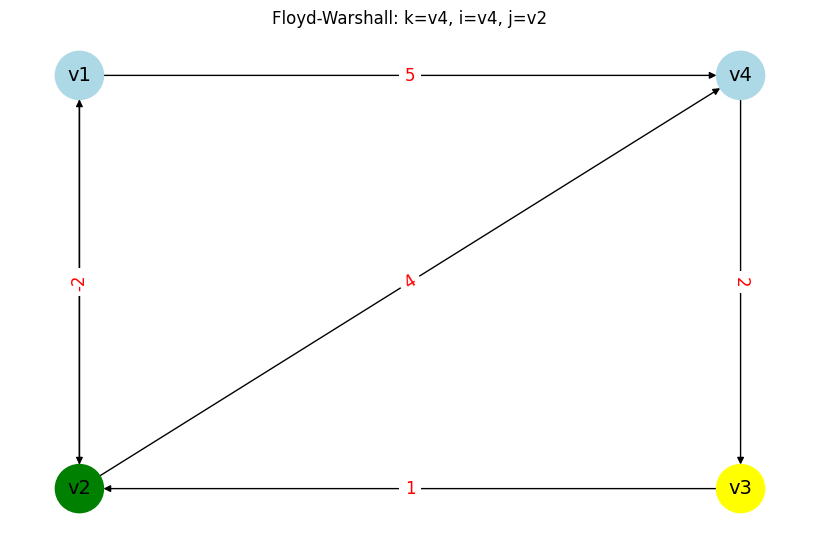

Passo: k=v4, i=v4, j=v2
Matriz de Distâncias (D):
v1: 0.0 3.0 7.0 5.0
v2: -2.0 0.0 5.0 3.0
v3: -1.0 1.0 0.0 4.0
v4: 1.0 3.0 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1  v4  v1
v2:  v2   -  v4  v1
v3:  v2  v3   -  v1
v4:  v2  v3  v4   -
----------------------------------------


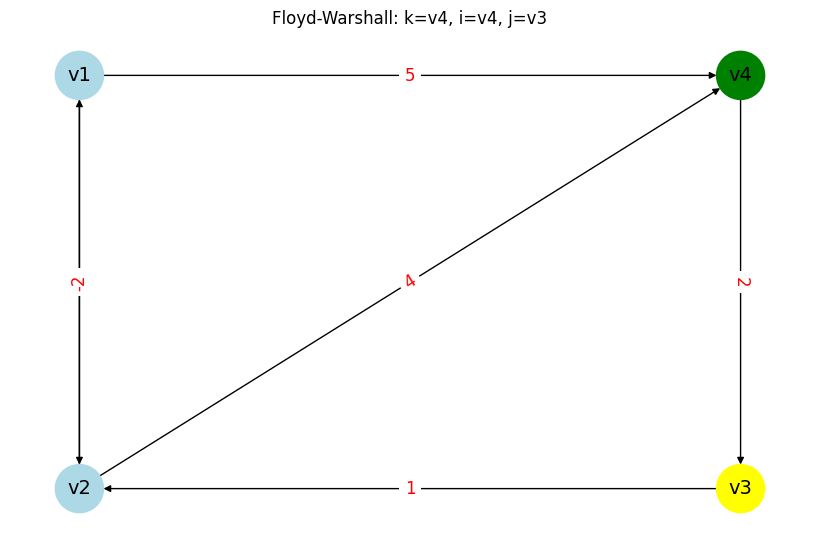

Passo: k=v4, i=v4, j=v3
Matriz de Distâncias (D):
v1: 0.0 3.0 7.0 5.0
v2: -2.0 0.0 5.0 3.0
v3: -1.0 1.0 0.0 4.0
v4: 1.0 3.0 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1  v4  v1
v2:  v2   -  v4  v1
v3:  v2  v3   -  v1
v4:  v2  v3  v4   -
----------------------------------------


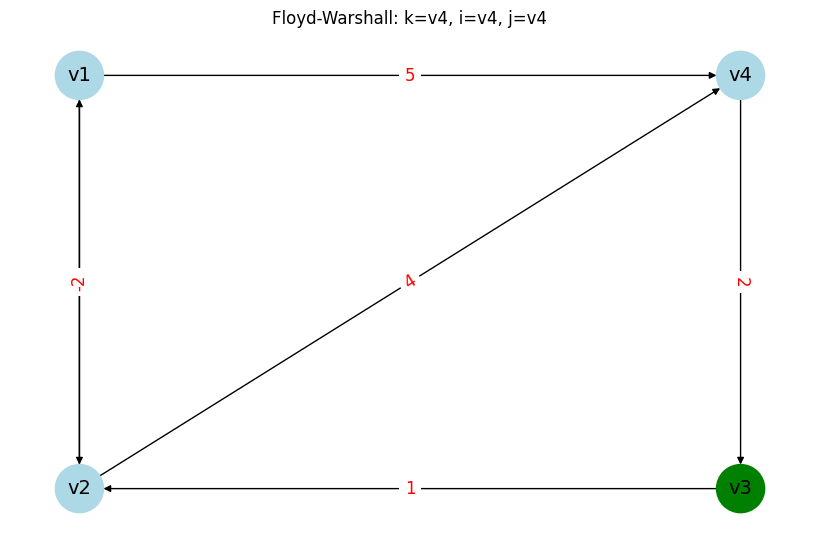

Passo: k=v4, i=v4, j=v4
Matriz de Distâncias (D):
v1: 0.0 3.0 7.0 5.0
v2: -2.0 0.0 5.0 3.0
v3: -1.0 1.0 0.0 4.0
v4: 1.0 3.0 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1  v4  v1
v2:  v2   -  v4  v1
v3:  v2  v3   -  v1
v4:  v2  v3  v4   -
----------------------------------------
Matriz de menores custos (Floyd-Warshall):
    v1  v2  v3  v4
v1: 0.0 3.0 7.0 5.0
v2: -2.0 0.0 5.0 3.0
v3: -1.0 1.0 0.0 4.0
v4: 1.0 3.0 2.0 0.0

Matriz de predecessores (R):
    v1  v2  v3  v4
v1:   -  v1  v4  v1
v2:  v2   -  v4  v1
v3:  v2  v3   -  v1
v4:  v2  v3  v4   -

Caminho mínimo de 'v1' até 'v2': v1 → v2
Custo: 3.0


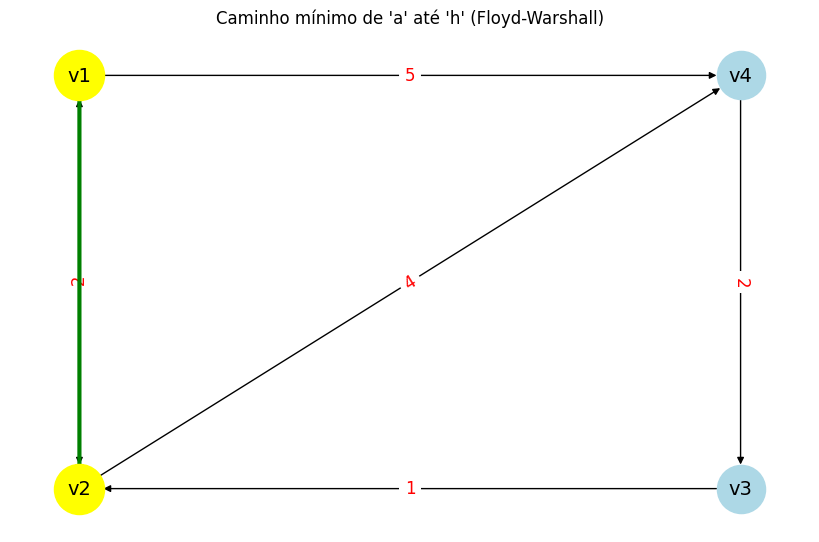

In [14]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# # Defina a posição fixa dos vértices
# pos = {
#     'a': (-2, 2),
#     'b': (0, 2),
#     'c': (2, 2),
#     'd': (4, 2),
#     'e': (1, 1),
#     'f': (-2, 0),
#     'g': (0, 0),
#     'h': (2, 0)
# }

# # Exemplo de grafo com pesos (pode ser dirigido ou não dirigido)
# G = nx.DiGraph()
# arestas = [
#     ('a', 'b', 5),
#     ('a', 'f', 4),
#     ('b', 'c', 4),
#     ('b', 'f', 5),
#     ('b', 'g', 15),
#     ('c', 'd', 15),
#     ('c', 'e', 8),
#     ('c', 'h', 9),
#     ('d', 'h', 15),
#     ('e', 'g', 2),
#     ('e', 'h', 11),
#     ('g', 'h', 9),
# ]


# Exemplo de grafo com pesos (pode ser dirigido ou não dirigido)
G = nx.DiGraph()
arestas = [
    ('v1', 'v2', 3),
    ('v1', 'v4', 5),
    ('v2', 'v1', -2),
    ('v2', 'v4', 4),
    ('v3', 'v2', 1),
    ('v4', 'v3', 2)
]
# Defina a posição fixa dos vértices
pos = {
    'v1': (0, 1),
    'v2': (0, 0),
    'v3': (1, 0),
    'v4': (1, 1),
}
for u, v, w in arestas:
    G.add_edge(u, v, weight=w)

labels = sorted(G.nodes)
n = len(labels)
label_idx = {label: idx for idx, label in enumerate(labels)}
inf = float('inf')

# Inicialização das matrizes de distância e roteamento
D = np.full((n, n), inf)
R = np.full((n, n), None, dtype=object)
for i, u in enumerate(labels):
    for j, v in enumerate(labels):
        if u == v:
            D[i, j] = 0
            R[i, j] = None
        elif G.has_edge(u, v):
            D[i, j] = G[u][v]['weight']
            R[i, j] = u
        else:
            D[i, j] = inf
            R[i, j] = None

# Função para plotar o grafo em cada etapa
def plot_floyd_warshall_step(G, D, R, labels, k, i, j):
    plt.figure(figsize=(8, 5))
    node_colors = ['lightblue' for _ in G.nodes]
    edge_colors = ['gray' for _ in G.edges]

    # Destacar os vértices sendo processados
    node_colors[k] = 'orange'  # Vértice intermediário
    node_colors[i] = 'yellow'  # Vértice de origem
    node_colors[j] = 'green'   # Vértice de destino

    # Destacar as arestas (i -> k) e (k -> j) se existirem
    edges = list(G.edges)
    if (labels[i], labels[k]) in edges:
        edge_colors[edges.index((labels[i], labels[k]))] = 'red'
    if (labels[k], labels[j]) in edges:
        edge_colors[edges.index((labels[k], labels[j]))] = 'red'

    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1200, font_size=14, arrows=True)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)
    plt.title(f"Floyd-Warshall: k={labels[k]}, i={labels[i]}, j={labels[j]}")
    plt.show()
    print(f"Passo: k={labels[k]}, i={labels[i]}, j={labels[j]}")
    print("Matriz de Distâncias (D):")
    for x in range(n):
        linha = [f"{D[x, y]:>3}" if D[x, y] != inf else " ∞" for y in range(n)]
        print(f"{labels[x]}: " + " ".join(linha))
    print("\nMatriz de Roteamento (R):")
    for x in range(n):
        linha = [f"{R[x, y] if R[x, y] is not None else '-':>3}" for y in range(n)]
        print(f"{labels[x]}: " + " ".join(linha))
    print("-" * 40)

# Floyd-Warshall com matriz de roteamento (passo a passo)
for k in range(n):
    for i in range(n):
        for j in range(n):
            if D[i, k] + D[k, j] < D[i, j]:
                D[i, j] = D[i, k] + D[k, j]
                R[i, j] = R[k, j]
            plot_floyd_warshall_step(G, D, R, labels, k, i, j)

# Exibir matriz de menores custos
print("Matriz de menores custos (Floyd-Warshall):")
print("    " + "  ".join(labels))
for i in range(n):
    linha = [f"{D[i, j]:>3}" if D[i, j] != inf else " ∞" for j in range(n)]
    print(f"{labels[i]}: " + " ".join(linha))

# Exibir matriz de predecessores
print("\nMatriz de predecessores (R):")
print("    " + "  ".join(labels))
for i in range(n):
    linha = [f"{R[i, j] if R[i, j] is not None else '-':>3}" for j in range(n)]
    print(f"{labels[i]}: " + " ".join(linha))

# Função para reconstruir caminho mínimo de u até v
def caminho_minimo(R, labels, u, v):
    if u not in labels or v not in labels:
        raise ValueError(f"Os vértices '{u}' ou '{v}' não estão presentes no grafo.")
    i, j = labels.index(u), labels.index(v)
    if D[i, j] == inf:
        return []
    caminho = [v]
    while R[i, j] is not None:
        v = R[i, j]
        j = labels.index(v)
        caminho.append(v)
    return caminho[::-1]

# Exemplo: caminho mínimo de 'v1' até 'v2'
caminho = caminho_minimo(R, labels, 'v1', 'v2')
print("\nCaminho mínimo de 'v1' até 'v2':", " → ".join(caminho))
print("Custo:", D[labels.index('v1'), labels.index('v2')])

# --- PLOT DO GRAFO DESTACANDO O CAMINHO MÍNIMO ---
plt.figure(figsize=(8, 5))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1200, font_size=14, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)
# Destaca o caminho mínimo de 'a' até 'h'
if len(caminho) > 1:
    path_edges = list(zip(caminho, caminho[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='green', width=3)
    nx.draw_networkx_nodes(G, pos, nodelist=caminho, node_color='yellow', node_size=1300)
plt.title("Caminho mínimo de 'a' até 'h' (Floyd-Warshall)")
plt.show()

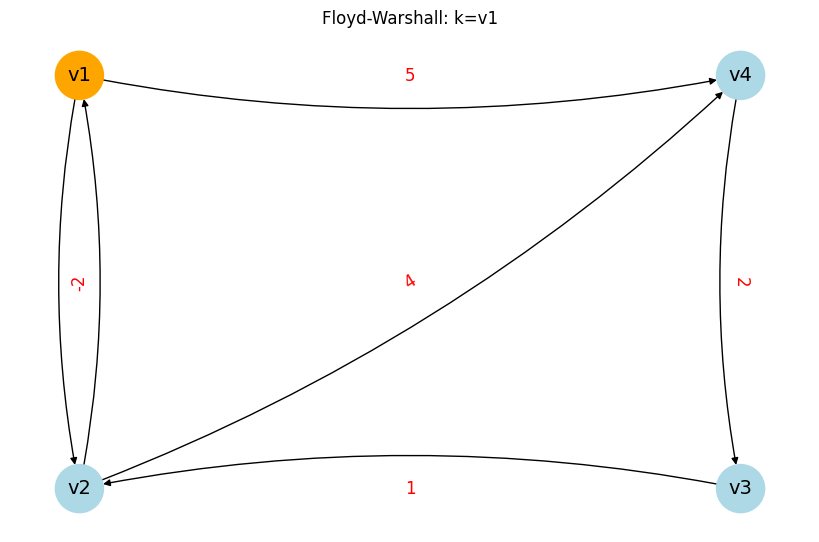

Passo: k=v1
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3:  ∞ 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:   -  v3   -   -
v4:   -   -  v4   -
----------------------------------------


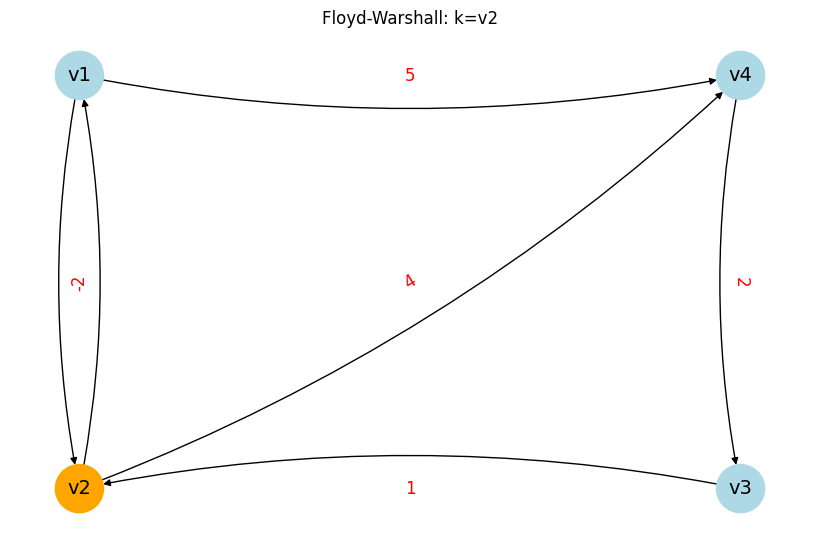

Passo: k=v2
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:   -   -  v4   -
----------------------------------------


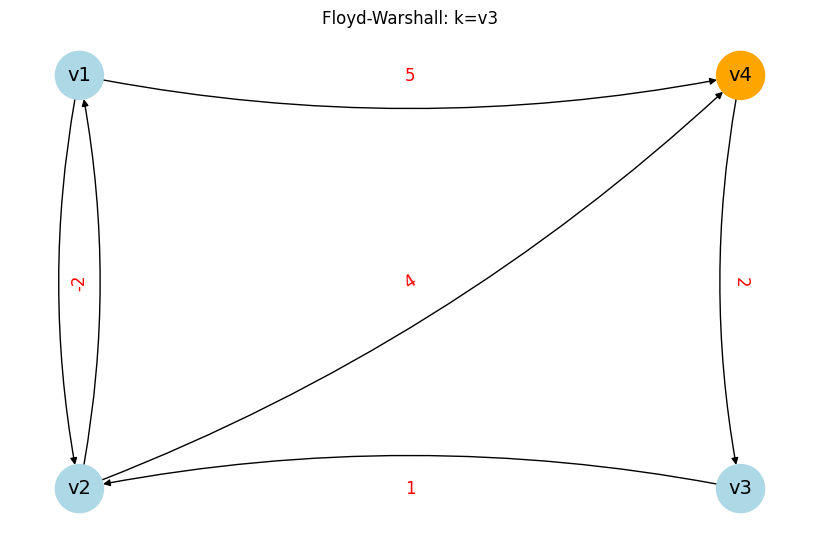

Passo: k=v3
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4: 1.0 3.0 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:  v2  v3  v4   -
----------------------------------------


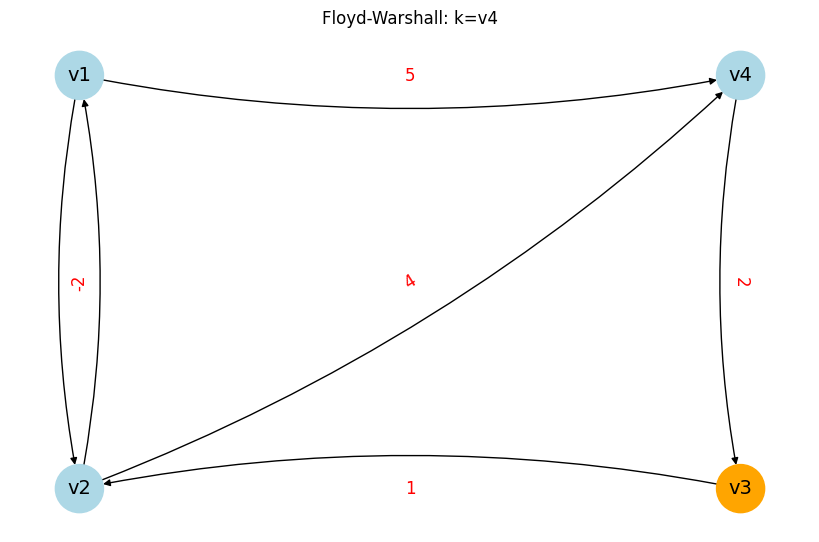

Passo: k=v4
Matriz de Distâncias (D):
v1: 0.0 3.0 7.0 5.0
v2: -2.0 0.0 5.0 3.0
v3: -1.0 1.0 0.0 4.0
v4: 1.0 3.0 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1  v4  v1
v2:  v2   -  v4  v1
v3:  v2  v3   -  v1
v4:  v2  v3  v4   -
----------------------------------------
Matriz de menores custos (Floyd-Warshall):
    v1  v2  v3  v4
v1: 0.0 3.0 7.0 5.0
v2: -2.0 0.0 5.0 3.0
v3: -1.0 1.0 0.0 4.0
v4: 1.0 3.0 2.0 0.0

Matriz de predecessores (R):
    v1  v2  v3  v4
v1:   -  v1  v4  v1
v2:  v2   -  v4  v1
v3:  v2  v3   -  v1
v4:  v2  v3  v4   -

Caminho mínimo de 'v1' até 'v2': v1 → v2
Custo: 3.0


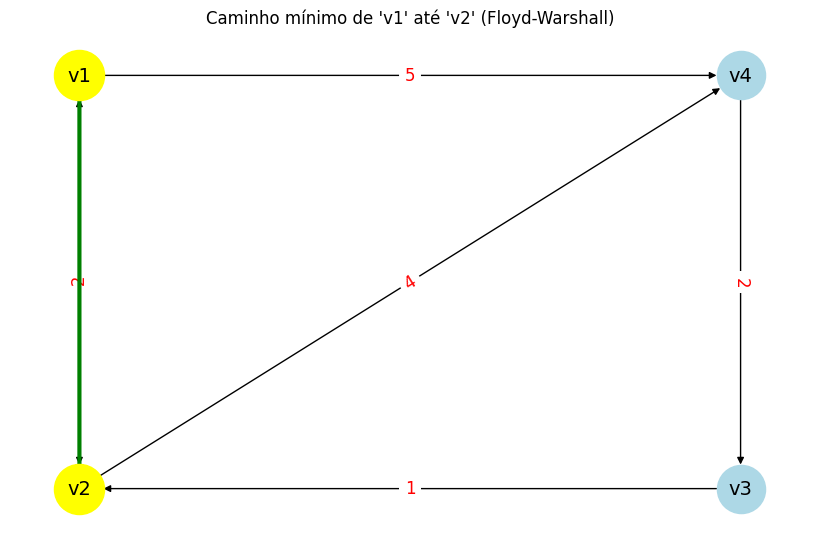

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Exemplo de grafo com pesos (pode ser dirigido ou não dirigido)
G = nx.DiGraph()
arestas = [
    ('v1', 'v2', 3),
    ('v1', 'v4', 5),
    ('v2', 'v1', -2),
    ('v2', 'v4', 4),
    ('v3', 'v2', 1),
    ('v4', 'v3', 2)
]
# Defina a posição fixa dos vértices
pos = {
    'v1': (0, 1),
    'v2': (0, 0),
    'v3': (1, 0),
    'v4': (1, 1),
}
for u, v, w in arestas:
    G.add_edge(u, v, weight=w)

labels = sorted(G.nodes)
n = len(labels)
label_idx = {label: idx for idx, label in enumerate(labels)}
inf = float('inf')

# Inicialização das matrizes de distância e roteamento
D = np.full((n, n), inf)
R = np.full((n, n), None, dtype=object)
for i, u in enumerate(labels):
    for j, v in enumerate(labels):
        if u == v:
            D[i, j] = 0
            R[i, j] = None
        elif G.has_edge(u, v):
            D[i, j] = G[u][v]['weight']
            R[i, j] = u
        else:
            D[i, j] = inf
            R[i, j] = None

# Função para plotar o grafo em cada etapa
def plot_floyd_warshall_step_k(G, D, R, labels, k):
    plt.figure(figsize=(8, 5))
    node_colors = ['lightblue' for _ in G.nodes]

    # Destacar o vértice intermediário
    node_colors[k] = 'orange'  # Vértice intermediário

    # Desenhar o grafo
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1200, font_size=14, arrows=True, connectionstyle="arc3,rad=0.1")
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)
    plt.title(f"Floyd-Warshall: k={labels[k]}")
    plt.show()
    print(f"Passo: k= {k} vértice intermediário: {labels[k]}")
    print("Matriz de Distâncias (D):")
    for x in range(n):
        linha = [f"{D[x, y]:>3}" if D[x, y] != inf else " ∞" for y in range(n)]
        print(f"{labels[x]}: " + " ".join(linha))
    print("\nMatriz de Roteamento (R):")
    for x in range(n):
        linha = [f"{R[x, y] if R[x, y] is not None else '-':>3}" for y in range(n)]
        print(f"{labels[x]}: " + " ".join(linha))
    print("-" * 40)

# Floyd-Warshall com matriz de roteamento (passo a passo para cada k)
for k in range(n):
    for i in range(n):
        for j in range(n):
            if D[i, k] + D[k, j] < D[i, j]:
                D[i, j] = D[i, k] + D[k, j]
                R[i, j] = R[k, j]
    plot_floyd_warshall_step_k(G, D, R, labels, k)

# Exibir matriz de menores custos
print("Matriz de menores custos (Floyd-Warshall):")
print("    " + "  ".join(labels))
for i in range(n):
    linha = [f"{D[i, j]:>3}" if D[i, j] != inf else " ∞" for j in range(n)]
    print(f"{labels[i]}: " + " ".join(linha))

# Exibir matriz de predecessores
print("\nMatriz de predecessores (R):")
print("    " + "  ".join(labels))
for i in range(n):
    linha = [f"{R[i, j] if R[i, j] is not None else '-':>3}" for j in range(n)]
    print(f"{labels[i]}: " + " ".join(linha))

# Função para reconstruir caminho mínimo de u até v
def caminho_minimo(R, labels, u, v):
    if u not in labels or v not in labels:
        raise ValueError(f"Os vértices '{u}' ou '{v}' não estão presentes no grafo.")
    i, j = labels.index(u), labels.index(v)
    if D[i, j] == inf:
        return []
    caminho = [v]
    while R[i, j] is not None:
        v = R[i, j]
        j = labels.index(v)
        caminho.append(v)
    return caminho[::-1]

# Exemplo: caminho mínimo de 'v1' até 'v2'
caminho = caminho_minimo(R, labels, 'v1', 'v2')
print("\nCaminho mínimo de 'v1' até 'v2':", " → ".join(caminho))
print("Custo:", D[labels.index('v1'), labels.index('v2')])

# --- PLOT DO GRAFO DESTACANDO O CAMINHO MÍNIMO ---
plt.figure(figsize=(8, 5))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1200, font_size=14, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)
# Destaca o caminho mínimo de 'v1' até 'v2'
if len(caminho) > 1:
    path_edges = list(zip(caminho, caminho[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='green', width=3)
    nx.draw_networkx_nodes(G, pos, nodelist=caminho, node_color='yellow', node_size=1300)
plt.title("Caminho mínimo de 'v1' até 'v2' (Floyd-Warshall)")
plt.show()

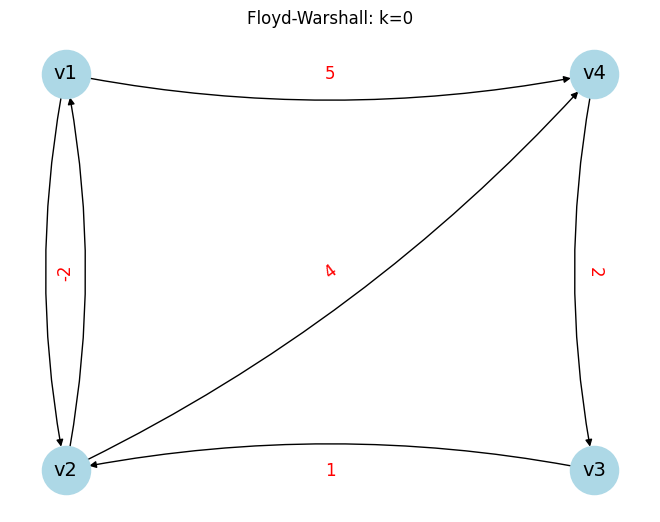

Passo: k = 0
Matriz de Distâncias (D):
    v1  v2  v3  v4
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 4.0
v3:  ∞ 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
    v1  v2  v3  v4
v1:   -  v1   -  v1
v2:  v2   -   -  v2
v3:   -  v3   -   -
v4:   -   -  v4   -

Neste passo k = 1, o vértice intermediário é v1.

Estamos verificando se passar por este vértice reduz a distância entre outros pares de vértices.
Verificando se D[v1][v1] pode ser melhorado passando por v1...
Distância atual: D[v1][v1] = 0.0
Distância via v1: D[v1][v1] + D[v1][v1] = 0.0 + 0.0 =  0.0
Se 0.0 < 0.0, atualizamos D e R.
===============Nenhuma atualização necessária para D[v1][v1].===============


Verificando se D[v1][v2] pode ser melhorado passando por v1...
Distância atual: D[v1][v2] = 3.0
Distância via v1: D[v1][v1] + D[v1][v2] = 0.0 + 3.0 =  3.0
Se 3.0 < 3.0, atualizamos D e R.
===============Nenhuma atualização necessária para D[v1][v2].===============


Verificando se D[v1][v3] pode ser melhorado passando por v1

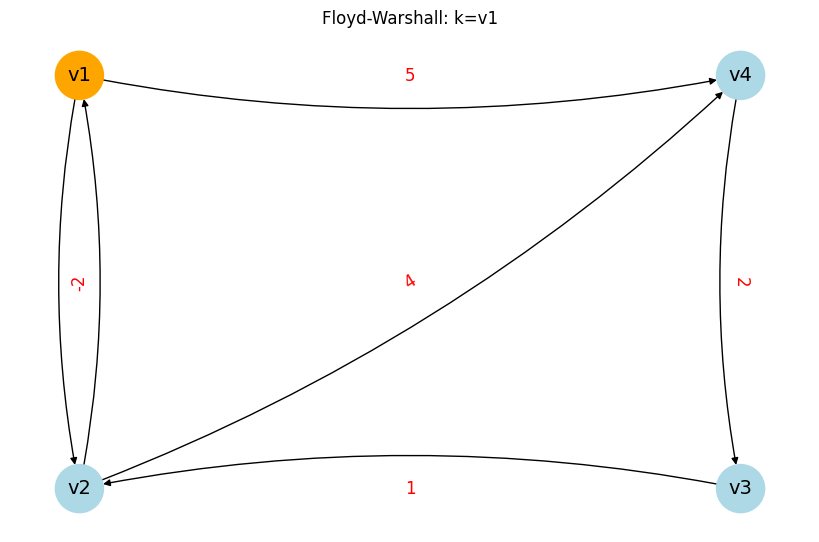

Passo: k=v1
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3:  ∞ 1.0 0.0  ∞
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:   -  v3   -   -
v4:   -   -  v4   -
----------------------------------------

Neste passo k = 2, o vértice intermediário é v2.

Estamos verificando se passar por este vértice reduz a distância entre outros pares de vértices.
Verificando se D[v1][v1] pode ser melhorado passando por v2...
Distância atual: D[v1][v1] = 0.0
Distância via v2: D[v1][v2] + D[v2][v1] = 3.0 + -2.0 =  1.0
Se 1.0 < 0.0, atualizamos D e R.
===============Nenhuma atualização necessária para D[v1][v1].===============


Verificando se D[v1][v2] pode ser melhorado passando por v2...
Distância atual: D[v1][v2] = 3.0
Distância via v2: D[v1][v2] + D[v2][v2] = 3.0 + 0.0 =  3.0
Se 3.0 < 3.0, atualizamos D e R.
===============Nenhuma atualização necessária para D[v1][v2].===============


Verificando se D[v1][v3] pode ser melhorado passando por

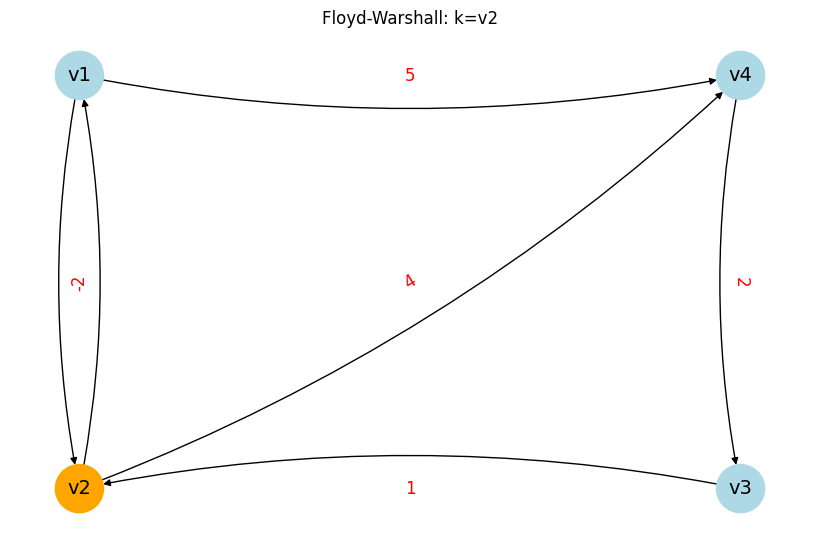

Passo: k=v2
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4:  ∞  ∞ 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:   -   -  v4   -
----------------------------------------

Neste passo k = 3, o vértice intermediário é v3.

Estamos verificando se passar por este vértice reduz a distância entre outros pares de vértices.
Verificando se D[v1][v1] pode ser melhorado passando por v3...
Distância atual: D[v1][v1] = 0.0
Distância via v3: D[v1][v3] + D[v3][v1] = inf + -1.0 =  inf
Se inf < 0.0, atualizamos D e R.
===============Nenhuma atualização necessária para D[v1][v1].===============


Verificando se D[v1][v2] pode ser melhorado passando por v3...
Distância atual: D[v1][v2] = 3.0
Distância via v3: D[v1][v3] + D[v3][v2] = inf + 1.0 =  inf
Se inf < 3.0, atualizamos D e R.
===============Nenhuma atualização necessária para D[v1][v2].===============


Verificando se D[v1][v3] pode ser melhorado passando 

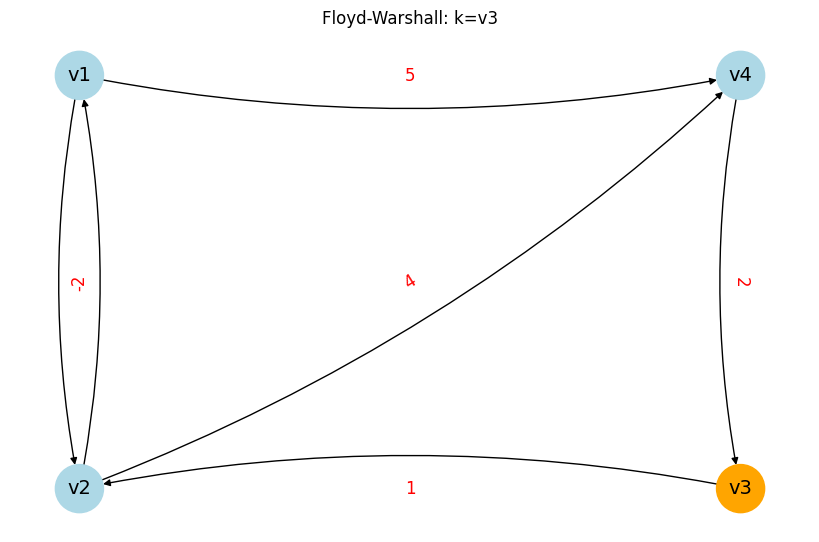

Passo: k=v3
Matriz de Distâncias (D):
v1: 0.0 3.0  ∞ 5.0
v2: -2.0 0.0  ∞ 3.0
v3: -1.0 1.0 0.0 4.0
v4: 1.0 3.0 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1   -  v1
v2:  v2   -   -  v1
v3:  v2  v3   -  v1
v4:  v2  v3  v4   -
----------------------------------------

Neste passo k = 4, o vértice intermediário é v4.

Estamos verificando se passar por este vértice reduz a distância entre outros pares de vértices.
Verificando se D[v1][v1] pode ser melhorado passando por v4...
Distância atual: D[v1][v1] = 0.0
Distância via v4: D[v1][v4] + D[v4][v1] = 5.0 + 1.0 =  6.0
Se 6.0 < 0.0, atualizamos D e R.
===============Nenhuma atualização necessária para D[v1][v1].===============


Verificando se D[v1][v2] pode ser melhorado passando por v4...
Distância atual: D[v1][v2] = 3.0
Distância via v4: D[v1][v4] + D[v4][v2] = 5.0 + 3.0 =  8.0
Se 8.0 < 3.0, atualizamos D e R.
===============Nenhuma atualização necessária para D[v1][v2].===============


Verificando se D[v1][v3] pode ser melhorado passando

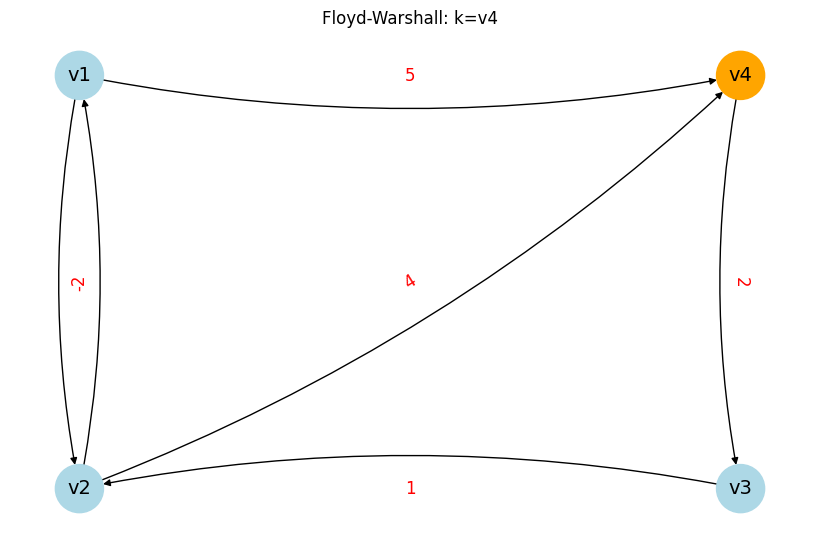

Passo: k=v4
Matriz de Distâncias (D):
v1: 0.0 3.0 7.0 5.0
v2: -2.0 0.0 5.0 3.0
v3: -1.0 1.0 0.0 4.0
v4: 1.0 3.0 2.0 0.0

Matriz de Roteamento (R):
v1:   -  v1  v4  v1
v2:  v2   -  v4  v1
v3:  v2  v3   -  v1
v4:  v2  v3  v4   -
----------------------------------------
Matriz de menores custos (Floyd-Warshall):
    v1  v2  v3  v4
v1: 0.0 3.0 7.0 5.0
v2: -2.0 0.0 5.0 3.0
v3: -1.0 1.0 0.0 4.0
v4: 1.0 3.0 2.0 0.0

Matriz de predecessores (R):
    v1  v2  v3  v4
v1:   -  v1  v4  v1
v2:  v2   -  v4  v1
v3:  v2  v3   -  v1
v4:  v2  v3  v4   -


In [45]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Exemplo de grafo com pesos (pode ser dirigido ou não dirigido)
G = nx.DiGraph()
arestas = [
    ('v1', 'v2', 3),
    ('v1', 'v4', 5),
    ('v2', 'v1', -2),
    ('v2', 'v4', 4),
    ('v3', 'v2', 1),
    ('v4', 'v3', 2)
]
# Defina a posição fixa dos vértices
pos = {
    'v1': (0, 1),
    'v2': (0, 0),
    'v3': (1, 0),
    'v4': (1, 1),
}
for u, v, w in arestas:
    G.add_edge(u, v, weight=w)


# Desenhar o grafo
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1200, font_size=14, arrows=True, connectionstyle="arc3,rad=0.1")
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)

# Adicionar título
plt.title("Floyd-Warshall: k=0")
plt.show()

labels = sorted(G.nodes)
n = len(labels)
label_idx = {label: idx for idx, label in enumerate(labels)}
inf = float('inf')

# Inicialização das matrizes de distância e roteamento
D = np.full((n, n), inf)
R = np.full((n, n), None, dtype=object)
for i, u in enumerate(labels):
    for j, v in enumerate(labels):
        if u == v:
            D[i, j] = 0
            R[i, j] = None
        elif G.has_edge(u, v):
            D[i, j] = G[u][v]['weight']
            R[i, j] = u
        else:
            D[i, j] = inf
            R[i, j] = None


print(f"Passo: k = 0")

print("Matriz de Distâncias (D):")
print("    " + "  ".join(labels))
for i in range(n):
    linha = [f"{D[i, j]:>3}" if D[i, j] != inf else " ∞" for j in range(n)]
    print(f"{labels[i]}: " + " ".join(linha))
print("\nMatriz de Roteamento (R):")
print("    " + "  ".join(labels))
for i in range(n):  
    linha = [f"{R[i, j] if R[i, j] is not None else '-':>3}" for j in range(n)]
    print(f"{labels[i]}: " + " ".join(linha))


# Função para plotar o grafo em cada etapa
def plot_floyd_warshall_step_k(G, D, R, labels, k):
    plt.figure(figsize=(8, 5))
    node_colors = ['lightblue' for _ in G.nodes]

    # Destacar o vértice intermediário
    intermediate_node = labels[k]  # Obter o vértice intermediário correspondente ao índice k
    node_index = list(G.nodes).index(intermediate_node)  # Encontrar o índice correto do vértice no grafo
    node_colors[node_index] = 'orange'  # Colorir o vértice intermediário

    # Desenhar o grafo
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1200, font_size=14, arrows=True, connectionstyle="arc3,rad=0.1")
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)
    

    # Adicionar título
    plt.title(f"Floyd-Warshall: k={labels[k]}")
    plt.show()
    print(f"Passo: k={labels[k]}")
    print("Matriz de Distâncias (D):")
    for x in range(n):
        linha = [f"{D[x, y]:>3}" if D[x, y] != inf else " ∞" for y in range(n)]
        print(f"{labels[x]}: " + " ".join(linha))
    print("\nMatriz de Roteamento (R):")
    for x in range(n):
        linha = [f"{R[x, y] if R[x, y] is not None else '-':>3}" for y in range(n)]
        print(f"{labels[x]}: " + " ".join(linha))
    print("-" * 40)

# Floyd-Warshall com matriz de roteamento (passo a passo para cada k)
for k in range(n):
    print(f"\nNeste passo k = {k+1}, o vértice intermediário é {labels[k]}.\n")
    print("Estamos verificando se passar por este vértice reduz a distância entre outros pares de vértices.")
    for i in range(n):
        for j in range(n):
            print(f"Verificando se D[{labels[i]}][{labels[j]}] pode ser melhorado passando por {labels[k]}...")
            print(f"Distância atual: D[{labels[i]}][{labels[j]}] = {D[i, j]}")
            print(f"Distância via {labels[k]}: D[{labels[i]}][{labels[k]}] + D[{labels[k]}][{labels[j]}] = {D[i, k]} + {D[k, j]} =  {D[i, k] + D[k, j]}")
            print(f"Se {D[i, k] + D[k, j]} < {D[i, j]}, atualizamos D e R.")
            # Se a distância através do vértice intermediário k for menor, atualiza D e R
            if D[i, k] + D[k, j] < D[i, j]:
                print(f"===========================Atualizando D[{labels[i]}][{labels[j]}]:============================")
                print(f"Antes: d[{labels[i]}][{labels[j]}] = {D[i, j]}")
                print(f"Novo: d[{labels[i]}][{labels[j]}] = D[{labels[i]}][{labels[k]}] + D[{labels[k]}][{labels[j]}] = {D[i, k]} + {D[k, j]} = {D[i, k] + D[k, j]}")
                D[i, j] = D[i, k] + D[k, j]
                print(f"===========================Atualizando R[{labels[i]}][{labels[j]}]:============================")
                print(f"Roteamento atualizado: R[{labels[i]}][{labels[j]}] = R[{labels[k]}][{labels[j]}] = {R[k, j]}")
                print(f"Antes: R[{labels[i]}][{labels[j]}] = {R[i, j]}")
                print(f"Novo: R[{labels[i]}][{labels[j]}] = R[{labels[k]}][{labels[j]}] = {R[k, j]}")
                R[i, j] = R[k, j]
                
            else:
                print(f"===============Nenhuma atualização necessária para D[{labels[i]}][{labels[j]}].===============")
            print(f"\n")
    plot_floyd_warshall_step_k(G, D, R, labels, k)

# Exibir matriz de menores custos
print("Matriz de menores custos (Floyd-Warshall):")
print("    " + "  ".join(labels))
for i in range(n):
    linha = [f"{D[i, j]:>3}" if D[i, j] != inf else " ∞" for j in range(n)]
    print(f"{labels[i]}: " + " ".join(linha))

# Exibir matriz de predecessores
print("\nMatriz de predecessores (R):")
print("    " + "  ".join(labels))
for i in range(n):
    linha = [f"{R[i, j] if R[i, j] is not None else '-':>3}" for j in range(n)]
    print(f"{labels[i]}: " + " ".join(linha))

# Função para reconstruir caminho mínimo de u até v
def caminho_minimo(R, labels, u, v):
    if u not in labels or v not in labels:
        raise ValueError(f"Os vértices '{u}' ou '{v}' não estão presentes no grafo.")
    
    # Obter os índices dos vértices u e v na lista de labels
    i, j = labels.index(u), labels.index(v)
    
    # Verificar se existe um caminho entre u e v
    if D[i, j] == inf:
        print(f"Não existe caminho entre '{u}' e '{v}'.")
        return []
    
    print(f"Reconstruindo o caminho mínimo de '{u}' até '{v}':")
    print(f"Custo total do caminho: {D[i, j]}")
    
    # Inicializar o caminho com o nó de destino
    caminho = [v]
    print(f"Começando pelo destino '{v}'.")

    # Usar a matriz de roteamento R para reconstruir o caminho
    while R[i, j] is not None:
        print(f"R[{labels[i]}][{labels[j]}] = {R[i, j]} (próximo nó no caminho)")
        v = R[i, j]  # Atualizar o nó atual para o predecessor
        j = labels.index(v)  # Atualizar o índice do nó
        caminho.append(v)
        print(f"Adicionando '{v}' ao caminho.")
    
    # Retornar o caminho na ordem correta (do início ao destino)
    caminho = caminho[::-1]
    print(f"Caminho reconstruído: {' → '.join(caminho)}")
    return caminho


Reconstruindo o caminho mínimo de 'v1' até 'v3':
Custo total do caminho: 7.0
Começando pelo destino 'v3'.
R[v1][v3] = v4 (próximo nó no caminho)
Adicionando 'v4' ao caminho.
R[v1][v4] = v1 (próximo nó no caminho)
Adicionando 'v1' ao caminho.
Caminho reconstruído: v1 → v4 → v3

Caminho mínimo de v1 até v3: v1 → v4 → v3
Custo: 7.0


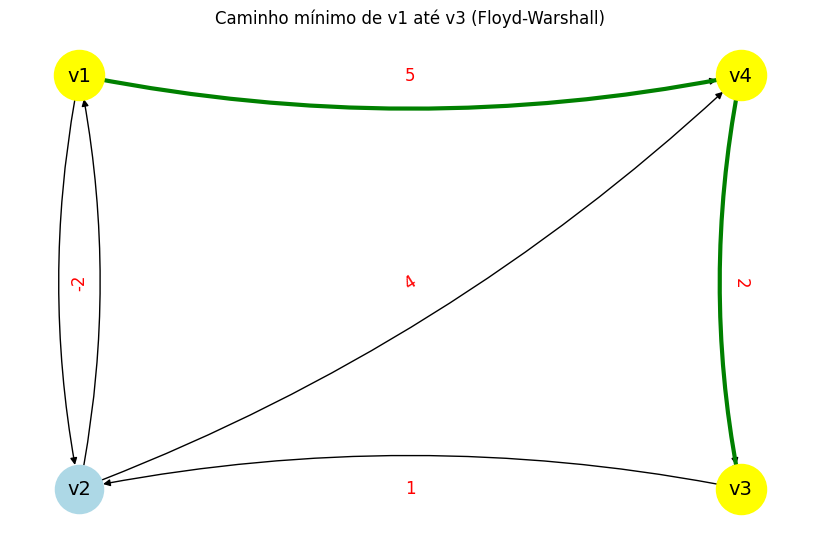

In [30]:

start = 'v1'
end = 'v3'

caminho = caminho_minimo(R, labels, start, end)
print(f"\nCaminho mínimo de {start} até {end}:", " → ".join(caminho))
print("Custo:", D[labels.index(start), labels.index(end)])

# --- PLOT DO GRAFO DESTACANDO O CAMINHO MÍNIMO ---
plt.figure(figsize=(8, 5))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1200, font_size=14, arrows=True, connectionstyle="arc3,rad=0.1")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)
# Destaca o caminho mínimo de 'v1' até 'v2'
if len(caminho) > 1:
    path_edges = list(zip(caminho, caminho[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='green', width=3, connectionstyle="arc3,rad=0.1")
    nx.draw_networkx_nodes(G, pos, nodelist=caminho, node_color='yellow', node_size=1300)
plt.title(f"Caminho mínimo de {start} até {end} (Floyd-Warshall)")
plt.show()